In [10]:
#! kaggle datasets download najzeko/steam-reviews-2021

zsh:1: command not found: kaggle


In [11]:
#!unzip steam-reviews-2021.zip

unzip:  cannot find or open steam-reviews-2021.zip, steam-reviews-2021.zip.zip or steam-reviews-2021.zip.ZIP.


In [12]:
# Function to parse time columns
def parse_time(time_in_secs):
    return pd.to_datetime(time_in_secs, unit = 's')

In [3]:
import pandas as pd
df = pd.read_csv('/Users/roberto/Desktop/steam_reviews.csv', header = 'infer', nrows = 7000000, parse_dates= ['timestamp_created', 'timestamp_updated','author.last_played'])

/var/folders/jp/fnr369_172b9ghtllhyqdmtw0000gp/T/ipykernel_45739/18283318.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('/Users/roberto/Desktop/steam_reviews.csv', header = 'infer', nrows = 7000000, parse_dates= ['timestamp_created', 'timestamp_updated','author.last_played'])
/var/folders/jp/fnr369_172b9ghtllhyqdmtw0000gp/T/ipykernel_45739/18283318.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('/Users/roberto/Desktop/steam_reviews.csv', header = 'infer', nrows = 7000000, parse_dates= ['timestamp_created', 'timestamp_updated','author.last_played'])
/var/folders/jp/fnr369_172b9ghtllhyqdmtw0000gp/T/ipykernel_45739/18283318.py:2: UserWarning: Could not infer format, so 

## **RQ1**


In [14]:
# 1 EDA
# 1.1 removing Na Values and counting the Null values

print(df.isnull().sum())
df = df.dropna()

Unnamed: 0                            0
app_id                                0
app_name                              0
review_id                             0
language                              0
review                            12265
timestamp_created                     0
timestamp_updated                     0
recommended                           0
votes_helpful                         0
votes_funny                           0
weighted_vote_score                   0
comment_count                         0
steam_purchase                        0
received_for_free                     0
written_during_early_access           0
author.steamid                        0
author.num_games_owned                0
author.num_reviews                    0
author.playtime_forever               2
author.playtime_last_two_weeks        2
author.playtime_at_review          9158
author.last_played                    2
dtype: int64


In [7]:
# Check it

# Outliers

df = df[
    (df['author.num_games_owned'] <= 50000) &
    (df['author.num_reviews'] <= 50000) &
    (df['votes_helpful']) <= 50000
]

mean_votes_funny = df.loc[df['votes_funny'] <= 50000, 'votes_funny'].mean()
df['votes_funny'] = df['votes_funny'].fillna(mean_votes_funny)
df.loc[df['votes_funny'] > 50000, 'votes_funny'] = mean_votes_funny

/var/folders/jp/fnr369_172b9ghtllhyqdmtw0000gp/T/ipykernel_45739/2863946222.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.8086222155553889' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['votes_funny'] > 50000, 'votes_funny'] = mean_votes_funny


In [8]:
# 1.1.1 Create subdf where duplicates are eliminated. It can be helpful for next exercises.

df_no_duplicates = df.drop_duplicates(subset=['review', 'author.steamid'])
df_no_duplicates.reset_index(drop=True, inplace=True)


In [9]:
# 1.2 Info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000000 entries, 0 to 6999999
Data columns (total 23 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   Unnamed: 0                      int64  
 1   app_id                          int64  
 2   app_name                        object 
 3   review_id                       int64  
 4   language                        object 
 5   review                          object 
 6   timestamp_created               object 
 7   timestamp_updated               object 
 8   recommended                     bool   
 9   votes_helpful                   int64  
 10  votes_funny                     float64
 11  weighted_vote_score             float64
 12  comment_count                   int64  
 13  steam_purchase                  bool   
 14  received_for_free               bool   
 15  written_during_early_access     bool   
 16  author.steamid                  int64  
 17  author.num_games_owned     

In [10]:
df.describe()

,Unnamed: 0,app_id,review_id,votes_helpful,votes_funny,weighted_vote_score,comment_count,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review
count,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,6.999998e+06,6.999998e+06,6.990842e+06
mean,3.500000e+06,3.667237e+05,5.390169e+07,1.664961e+00,8.086222e-01,1.542318e-01,1.118586e-01,7.656120e+16,1.885003e+06,6.283023e+05,1.491453e+04,1.542809e+02,8.135945e+03
std,2.020726e+06,2.727529e+05,2.080707e+07,3.197741e+01,2.776365e+01,2.389767e-01,1.559824e+00,3.288769e+08,2.879197e+09,1.662305e+09,3.624655e+04,6.798882e+02,2.382067e+04
min,0.000000e+00,7.000000e+01,4.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.656120e+16,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,1.750001e+06,2.338600e+05,3.918787e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.656120e+16,2.100000e+01,2.000000e+00,1.318000e+03,0.000000e+00,5.460000e+02
50%,3.500000e+06,3.595500e+05,5.702682e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.656120e+16,5.700000e+01,4.000000e+00,4.269000e+03,0.000000e+00,1.848000e+03
75%,5.250000e+06,4.319600e+05,7.132444e+07,1.000000e+00,0.000000e+00,4.761905e-01,0.000000e+00,7.656120e+16,1.360000e+02,9.000000e+00,1.320200e+04,0.000000e+00,6.148000e+03
max,7.000000e+06,1.225330e+06,8.521834e+07,2.960800e+04,1.601200e+04,9.959868e-01,7.580000e+02,7.656120e+16,4.398047e+12,4.398047e+12,3.470649e+06,2.213400e+04,3.228103e+06


In [11]:
df.head()

,Unnamed: 0,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
0,0,292030,The Witcher 3: Wild Hunt,85185598,schinese,不玩此生遗憾，RPG游戏里的天花板，太吸引人了,1611381629,1611381629,True,0,...,True,False,False,76561199095369542,6,2,1909.0,1448.0,1909.0,1611343383.0
1,1,292030,The Witcher 3: Wild Hunt,85185250,schinese,拔DIAO无情打桩机--杰洛特!!!,1611381030,1611381030,True,0,...,True,False,False,76561198949504115,30,10,2764.0,2743.0,2674.0,1611386307.0
2,2,292030,The Witcher 3: Wild Hunt,85185111,schinese,巫师3NB,1611380800,1611380800,True,0,...,True,False,False,76561199090098988,5,1,1061.0,1061.0,1060.0,1611383777.0
3,3,292030,The Witcher 3: Wild Hunt,85184605,english,"One of the best RPG's of all time, worthy of a...",1611379970,1611379970,True,0,...,True,False,False,76561199054755373,5,3,5587.0,3200.0,5524.0,1611383744.0
4,4,292030,The Witcher 3: Wild Hunt,85184287,schinese,大作,1611379427,1611379427,True,0,...,True,False,False,76561199028326951,7,4,217.0,42.0,217.0,1610788249.0


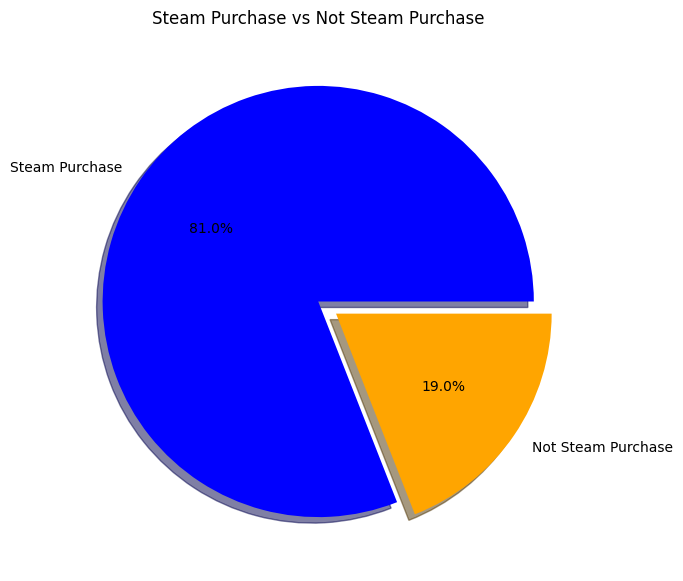

steam_purchase
True     5667087
False    1332913
Name: count, dtype: int64


In [12]:
# 1.2 Some Plots
import matplotlib.pyplot as plt
import seaborn as sns

# A) We'll do two pie plots of: steam purchase (True/False) ; received for free (True/False)
# Our objective is to see if -- "steam purchase" == False corresponds to "received for free" == True -- or not

# Plot of steam purchase
explode = [0,0.1]
colors = "blue", "orange"
plt.figure(figsize = (7,7))
plt.pie(df['steam_purchase'].value_counts(), labels = ['Steam Purchase', 'Not Steam Purchase'], autopct = '%1.1f%%',
        colors = colors,
        explode = explode,
        shadow = True)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.title('Steam Purchase vs Not Steam Purchase')
plt.show()

print(df['steam_purchase'].value_counts())

# Its pretty obvious from the result that if someone didn't purchase on steam the game
# he won't necessary receive it for free. We will study this case better in the next RQ

# (...)

received_for_free
False    6798991
True      201009
Name: count, dtype: int64


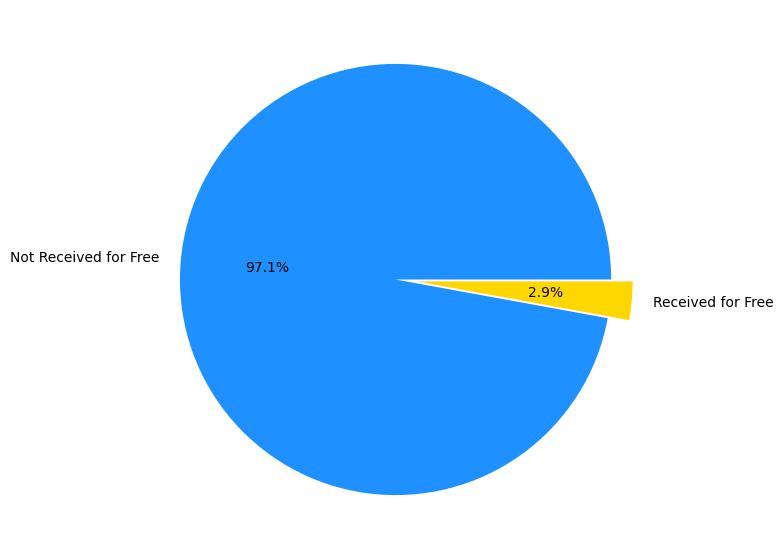

In [13]:
# Plot of received for free

colors = "dodgerblue", "gold"
explode = [0,0.1]
plt.figure(figsize = (7,7))
plt.pie(df['received_for_free'].value_counts(), labels = ['Not Received for Free', 'Received for Free'], autopct = '%1.1f%%',
        colors = colors,
        explode = explode)

print(df['received_for_free'].value_counts())

# (...)

# 81.0% of the people purchased the game on steam while 19.0% of the people did not.
# At the same time, 97.1% did not received the game for free, while 2.9% did it.

# Therefore, there is a part of our population that got the apps in other ways; it could
# be that they bought it from other digital platforms or from a physical store (if
# that's possible). It would be interesting to understand why people should write
# a review on "steam" while they get the app elsewhere (even if they are a minority).



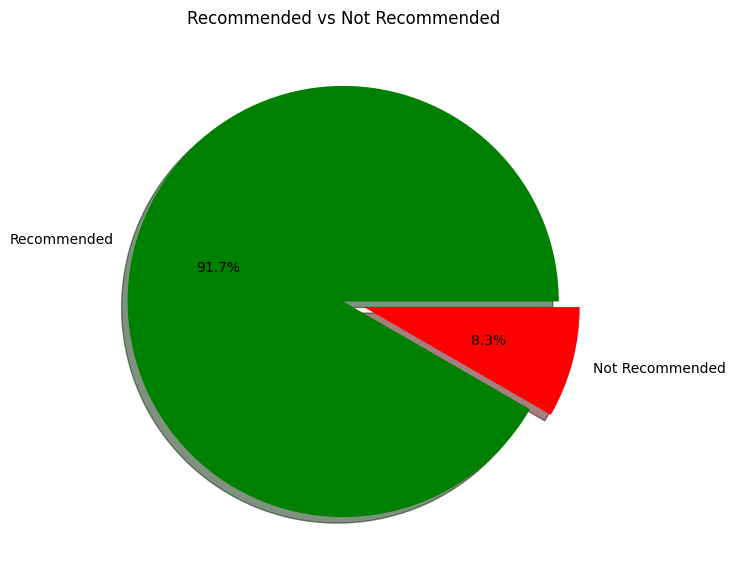

recommended
True     6416900
False     583100
Name: count, dtype: int64


In [14]:
# B) Pie Plot of Recommendations

plt.figure(figsize = (7,7))
colors = "green", "red"
explode = [0,0.1]
plt.pie(df['recommended'].value_counts(), labels = ['Recommended', 'Not Recommended'], autopct = '%1.1f%%',
        colors = colors,
        explode = explode,
        shadow = True)

plt.title('Recommended vs Not Recommended')
plt.show()

print(df['recommended'].value_counts())

# From this pieplot we can see that:
# 1) 91.7% of the reviews recommend the app/game
# 2) 8.3% of the reviews do not recommend the app/game

# Such a high recommendation value is an indicator of reliability,
# which can positively affect the growth of the user base, as new users will be more
# likely to try the game/app based on positive feedback. This could be part of
# an attractive loop in the digital platform.

# Instead, a low percentage of users who do not recommend the app suggests that the problems
# encountered by these users are probably less common or concern specific aspects
# that have not affected the majority of the apps.

# We should also consider that in digital platforms like "steam" there could be
# reviews influenced by aspects beyond the control of the app distributor
# (such as price changes), by personal taste or by strategic distortions such as fake reviews
# (which can negatively affect the number of recommendations in an application).


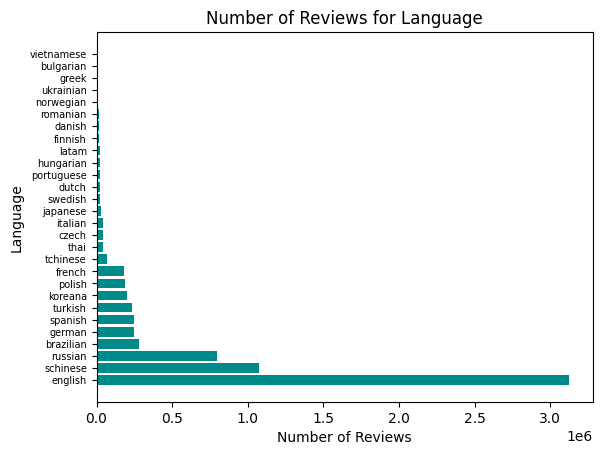

In [15]:
# C) BarPlot of Reviews' languages

plt.barh(df['language'].value_counts().index, df['language'].value_counts().values, color = "darkcyan")
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 7)
plt.xlabel('Number of Reviews')
plt.ylabel('Language')
plt.title('Number of Reviews for Language')
plt.show()

# from this analisys we can see that the most used languages for reviewing are:
# 1. english, 2. simple chinese, 3. russian (descending order for number of reviews)
# at the same time, the least used languages are:
# 1. vietnamese, 2. bulgarian, 3. greek (ascending order for number of reviews)



                           app_name  author.playtime_forever
77   Tom Clancy's Rainbow Six Siege             2.581577e+10
31                      Garry's Mod             2.225030e+10
21                 Dead by Daylight             9.713996e+09
26           Euro Truck Simulator 2             6.000355e+09
61       Sid Meier's Civilization V             4.335758e+09
..                              ...                      ...
23  Don't Escape: 4 Days to Survive             9.737610e+05
38            Hunt Down The Freeman             8.920200e+05
54                  Rapture Rejects             5.411130e+05
59        Shadow Complex Remastered             4.640190e+05
24                      Down To One             4.263750e+05

[88 rows x 2 columns]


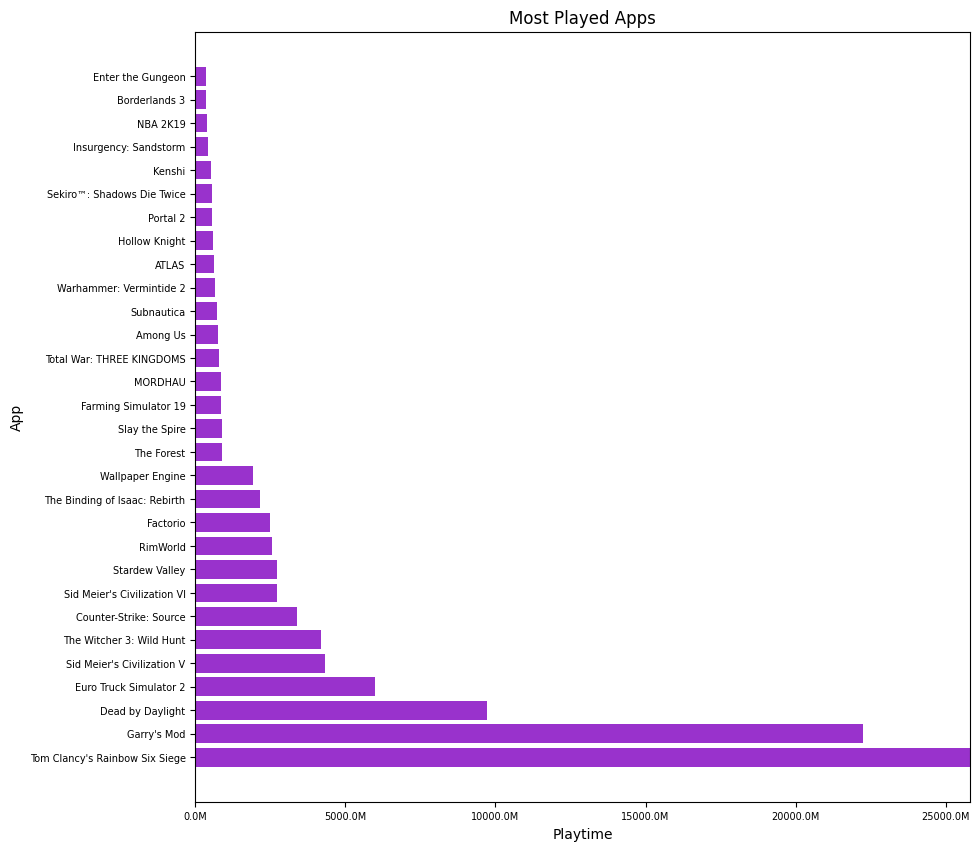

In [16]:
# Most played apps/games

import matplotlib.ticker as ticker

most_played_games = df.groupby('app_name')['author.playtime_forever'].sum().reset_index().sort_values('author.playtime_forever', ascending = False)
print(most_played_games)

plt.figure(figsize = (10, 10))
plt.barh(most_played_games['app_name'].head(30), most_played_games['author.playtime_forever'].head(30), color = "darkorchid")
plt.xticks(fontsize = 7)
plt.yticks(fontsize = 7)
plt.xlim(0, most_played_games['author.playtime_forever'].max() + 1000000)


######################################
def millions(x, pos):
    return f'{x * 1e-6:.1f}M'

# define the millions function to change the xi's

######################################


plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(millions))
plt.xlabel('Playtime')
plt.ylabel('App')
plt.title('Most Played Apps')
plt.show()

# we can see the most and the least played games (using the variable "author.playtime_forever" --> in hours)
# they're printed in the output (see below ->)

In [17]:
# Playtime after reviews

df['playtime_after_review'] = df['author.playtime_forever'] - df['author.playtime_at_review']
print(df[['author.steamid','author.playtime_forever','author.playtime_at_review','playtime_after_review']])

average_time_after_review = df['playtime_after_review'].mean()
print(f'Average time spent after the review: {average_time_after_review}')

# now, we want to find the playtime after that the author reviewed the game, to see if they continued
# it or not, and if they did, how much time they spent on it


            author.steamid  author.playtime_forever  \
0        76561199095369542                   1909.0   
1        76561198949504115                   2764.0   
2        76561199090098988                   1061.0   
3        76561199054755373                   5587.0   
4        76561199028326951                    217.0   
...                    ...                      ...   
6999995  76561198862012910                   3401.0   
6999996  76561199058577709                   5744.0   
6999997  76561198999736722                   1348.0   
6999998  76561198068603195                   4274.0   
6999999  76561198972736489                   4556.0   

         author.playtime_at_review  playtime_after_review  
0                           1909.0                    0.0  
1                           2674.0                   90.0  
2                           1060.0                    1.0  
3                           5524.0                   63.0  
4                            217.0     

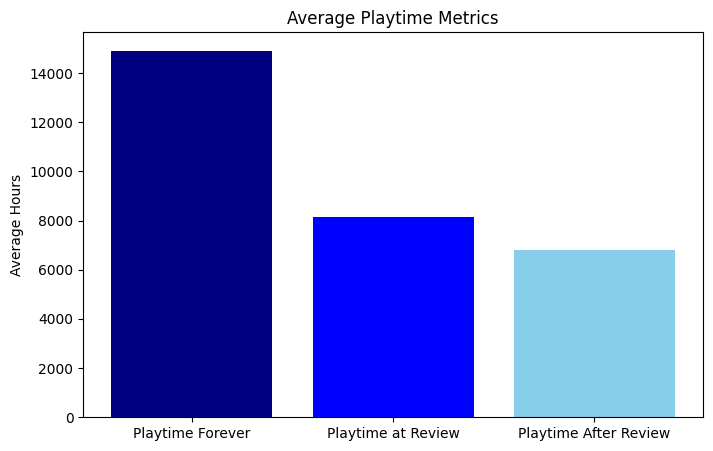

In [18]:
mean_values = [
    df['author.playtime_forever'].mean(),
    df['author.playtime_at_review'].mean(),
    df['playtime_after_review'].mean()
]

labels = ['Playtime Forever', 'Playtime at Review', 'Playtime After Review']
plt.figure(figsize=(8, 5))
plt.bar(labels, mean_values, color=['navy', 'blue', 'skyblue'])
plt.ylabel('Average Hours')
plt.title('Average Playtime Metrics')
plt.show()

# we calculate the average playtime metrics (playtime forever = total playtime,
# playtime at review and playtime after review) and use a Barplot to see graphically
# the differences

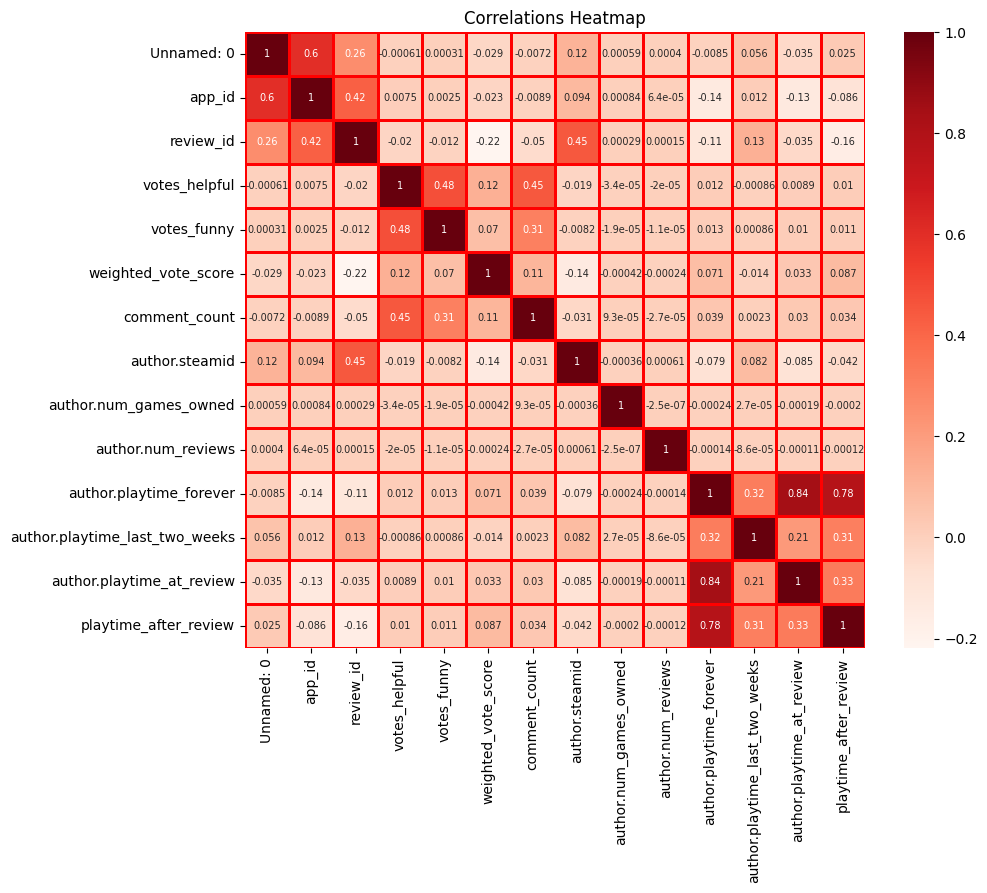

In [19]:
# heatmap to see correlations

import seaborn as sns
import numpy as np

df_numeric = df.select_dtypes(include=['float64', 'int64'])

correlation_matrix = df_numeric.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, annot_kws={"size": 7}, linewidths=1, linecolor='red', cmap="Reds")
plt.title('Correlations Heatmap')
plt.show()



### **RQ2**


# ***2.1:*** *Identify which applications have the highest and lowest number of reviews.*

In [20]:
# Identify which applications have the highest and lowest number of reviews.

df.groupby('app_name')['review_id'].count().sort_values(ascending = False)

# we can see in the output below the apps with the highest and lowest number of
# reviews (the maximum number is 839838 and the minimum is 699)

app_name
Tom Clancy's Rainbow Six Siege     841918
Garry's Mod                        655524
The Witcher 3: Wild Hunt           469395
Dead by Daylight                   418897
Euro Truck Simulator 2             387553
                                    ...  
Identity                             1804
Rapture Rejects                      1603
Slipstream                           1103
Don't Escape: 4 Days to Survive      1013
Shadow Complex Remastered             700
Name: review_id, Length: 88, dtype: int64

# ***2.2:***    *Plot the number of reviews for each application in descending order. What insights can you draw from the plot?*


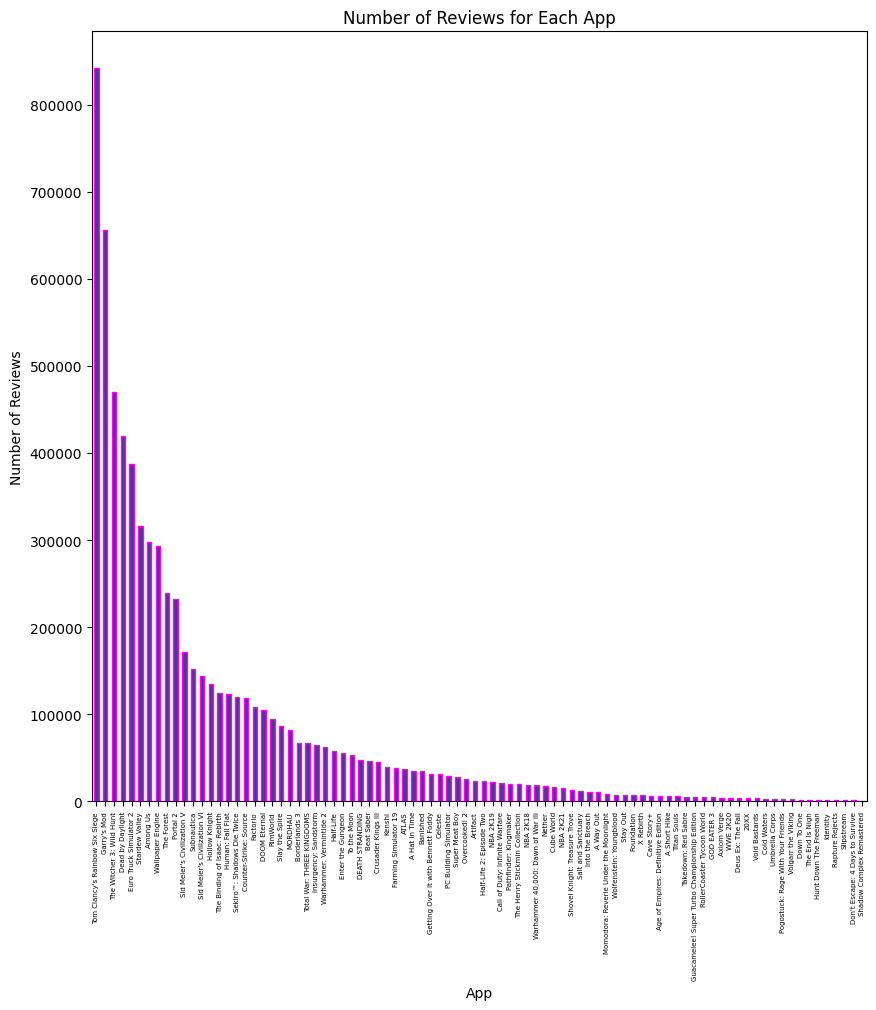

In [21]:
# Plot the number of reviews for each application in descending order. What insights can you draw from the plot?


df.groupby('app_name')['review_id'].count().sort_values(ascending = False).plot(kind = 'bar', figsize = (10, 10), color = 'darkslateblue', edgecolor = 'fuchsia')
plt.xticks(fontsize = 5)
plt.yticks(fontsize = 10)
plt.title('Number of Reviews for Each App')
plt.xlabel('App')
plt.ylabel('Number of Reviews')
plt.show()

# from the plot, we can see that the biggest part of reviews are concentrated in the
# first (about) 20 applications. It could be a synthom of their different popularity,
# and also of the number of players they have --> from an,
# economic point of view, this can imply a not strong enough kind
# of marketing for the game or something similar.

# this is also called "long-tail" case, and it is common to most of the
# digital platforms (a reduced part of the elements receive the most part of the attention --> EX: products
# in Amazon.com)

# Furthermore, we could have a kind of "Matthew Effect" where "Rich gets Richer" but in the
# sense that the more reviews an app have and the more it will have (and the contrary)



## ***2.3:*** *For the top 5 applications by number of reviews, how many reviews came from users who purchased the application versus those who received it for free? Provide a percentage breakdown and highlight any similarities.*

In [22]:
# For the top 5 applications by number of reviews, how many reviews came from users who purchased the application
# versus those who received it for free? Provide a percentage breakdown and highlight any similarities

# Count the number of reviews for every game
app_review_counts = df['app_name'].value_counts()

# Top 5 Games
top_5_apps = app_review_counts.head(5).index.tolist()

print("Top 5 App for number of reviews:")
for app in top_5_apps:
    print(app)

for app in top_5_apps:
    app_df = df[df['app_name'] == app]
    total_reviews = len(app_df)

    # Number of reviews from who purchased the game on steam
    purchased_reviews = app_df[app_df['steam_purchase'] == True]
    num_purchased_reviews = len(purchased_reviews)
    perc_purchased_reviews = (num_purchased_reviews / total_reviews) * 100

    # Number of reviews from who received the game for free
    free_reviews = app_df[app_df['received_for_free'] == True]
    num_free_reviews = len(free_reviews)
    perc_free_reviews = (num_free_reviews / total_reviews) * 100

    # Print the results
    print(f"\nApp: {app}")
    print(f"Total number of reviews: {total_reviews}")
    print(f"Reviews from who purchased the app on steam: {num_purchased_reviews} ({perc_purchased_reviews:.2f}%)")
    print(f"Reviews from who received the app for free: {num_free_reviews} ({perc_free_reviews:.2f}%)")

# The majority of the reviews for each top 5 applications (in terms of reviews) are
# written by people who purchased the app on steam.

# There is a low percentage of reviews
# from users who have received the game for free.

# The percentages are similar between different applications,
# suggesting common trends in user behavior and distribution strategies.

# Reviews within a digital platform like "Steam" can generate attractive loops.
# Since a greater number of buyers on a platform makes the average rating of the
# product more informative, through reviews, a platform with such a system has
# positive network effects within the group among buyers.

# So, users are inclined to prefer the purchase on the platform from which
# they obtain information.

# This means: more buyers on the platform -> more reviews --> more buyers on the platform ---> etc.





Top 5 App for number of reviews:
Tom Clancy's Rainbow Six Siege
Garry's Mod
The Witcher 3: Wild Hunt
Dead by Daylight
Euro Truck Simulator 2

App: Tom Clancy's Rainbow Six Siege
Total number of reviews: 841918
Reviews from who purchased the app on steam: 702505 (83.44%)
Reviews from who received the app for free: 36300 (4.31%)

App: Garry's Mod
Total number of reviews: 655524
Reviews from who purchased the app on steam: 551250 (84.09%)
Reviews from who received the app for free: 24765 (3.78%)

App: The Witcher 3: Wild Hunt
Total number of reviews: 469395
Reviews from who purchased the app on steam: 429409 (91.48%)
Reviews from who received the app for free: 5748 (1.22%)

App: Dead by Daylight
Total number of reviews: 418897
Reviews from who purchased the app on steam: 305787 (73.00%)
Reviews from who received the app for free: 20234 (4.83%)

App: Euro Truck Simulator 2
Total number of reviews: 387553
Reviews from who purchased the app on steam: 289715 (74.75%)
Reviews from who received

In [23]:
for app in top_5_apps:
    app_df = df[df['app_name'] == app]
    total_reviews = len(app_df)

    # Create a contingency table
    contingency_table = pd.crosstab(app_df['steam_purchase'], app_df['received_for_free'])

    contingency_table_perc = (contingency_table / total_reviews) * 100

    print(f"\nApp: {app}")
    print(f"Total Reviews number: {total_reviews}")
    print("Contingency Table:")
    print(contingency_table)
    print("Contingency Table (percent):")
    print(contingency_table_perc.round(2))




App: Tom Clancy's Rainbow Six Siege
Total Reviews number: 841918
Contingency Table:
received_for_free   False  True 
steam_purchase                  
False              125658  13755
True               679960  22545
Contingency Table (percent):
received_for_free  False  True 
steam_purchase                 
False              14.93   1.63
True               80.76   2.68

App: Garry's Mod
Total Reviews number: 655524
Contingency Table:
received_for_free   False  True 
steam_purchase                  
False               97030   7244
True               533729  17521
Contingency Table (percent):
received_for_free  False  True 
steam_purchase                 
False              14.80   1.11
True               81.42   2.67

App: The Witcher 3: Wild Hunt
Total Reviews number: 469395
Contingency Table:
received_for_free   False  True 
steam_purchase                  
False               38574   1412
True               425073   4336
Contingency Table (percent):
received_for_free  False  True 

In [30]:
# Altair interactive graphics

import altair as alt

for app in top_5_apps:
    app_df = df[df['app_name'] == app]
    total_reviews = len(app_df)

    app_df['Category'] = app_df.apply(lambda row:
                                       'Purchased (Steam)' if row['steam_purchase'] and not row['received_for_free'] else
                                       'Free' if not row['steam_purchase'] and row['received_for_free'] else
                                       'Other', axis=1)

    category_counts = app_df['Category'].value_counts().reset_index()
    category_counts.columns = ['Category', 'Count']
    category_counts['Percentage'] = (category_counts['Count'] / app_df.shape[0]) * 100

    chart = alt.Chart(category_counts).mark_bar().encode(
        x=alt.X('Category', sort=['Purchased (Steam)', 'Free']),
        y='Count',
        color=alt.Color('Category', scale=alt.Scale(scheme='set2')),
        tooltip=['Category', 'Count', alt.Tooltip('Percentage', format='.2f')]
    ).properties(
        title=f"Review distribution for '{app}'"
    ).interactive()

    chart.display()


/var/folders/jp/fnr369_172b9ghtllhyqdmtw0000gp/T/ipykernel_42305/3338599216.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app_df['Category'] = app_df.apply(lambda row:


alt.Chart(...)

/var/folders/jp/fnr369_172b9ghtllhyqdmtw0000gp/T/ipykernel_42305/3338599216.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app_df['Category'] = app_df.apply(lambda row:


alt.Chart(...)

/var/folders/jp/fnr369_172b9ghtllhyqdmtw0000gp/T/ipykernel_42305/3338599216.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app_df['Category'] = app_df.apply(lambda row:


alt.Chart(...)

/var/folders/jp/fnr369_172b9ghtllhyqdmtw0000gp/T/ipykernel_42305/3338599216.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app_df['Category'] = app_df.apply(lambda row:


alt.Chart(...)

/var/folders/jp/fnr369_172b9ghtllhyqdmtw0000gp/T/ipykernel_42305/3338599216.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app_df['Category'] = app_df.apply(lambda row:


alt.Chart(...)

## ***2.4:*** *Which applications have the most and the least user recommendations? Summarize your findings.*

In [24]:
# Which applications have the most and the least user recommendations? Summarize your findings.

df.groupby('app_name')['recommended'].mean().sort_values(ascending = False)


# The top 5 applications for number of reccommendations are: "Factorio", "Portal 2", "Don't Escape: 4 Days to Survive",
# "RimWorld", "Wallpaper Engine".

# The least 5 applications for number of recommendations are: "Deus Ex: The Fall", "NBA 2K18", "Umbrella Corps",
# "RollerCoaster Tycoon World", "Identity".

# With our analysis we can observe how applications that meet or exceed players' expectations get better ratings.

# "Portal 2" and "Factorio" are examples of applications (games) that have met or exceeded the expectations of users,
# unlike games like "Umbrella Corps" (from the brand "Resident Evil") or "NBA 2K18", both with high expectations but
# which have been found to be of low quality (or in any case with obvious problems).

# Therefore, popularity can often lead to negative consequences, given by high expectations and greater attention
# to detail on the part of those who use the application.

app_name
A Short Hike                       0.991449
The Henry Stickmin Collection      0.990258
Factorio                           0.989186
Portal 2                           0.987694
Don't Escape: 4 Days to Survive    0.985192
                                     ...   
Deus Ex: The Fall                  0.344321
NBA 2K18                           0.291965
Umbrella Corps                     0.282236
RollerCoaster Tycoon World         0.245098
Identity                           0.243348
Name: recommended, Length: 88, dtype: float64

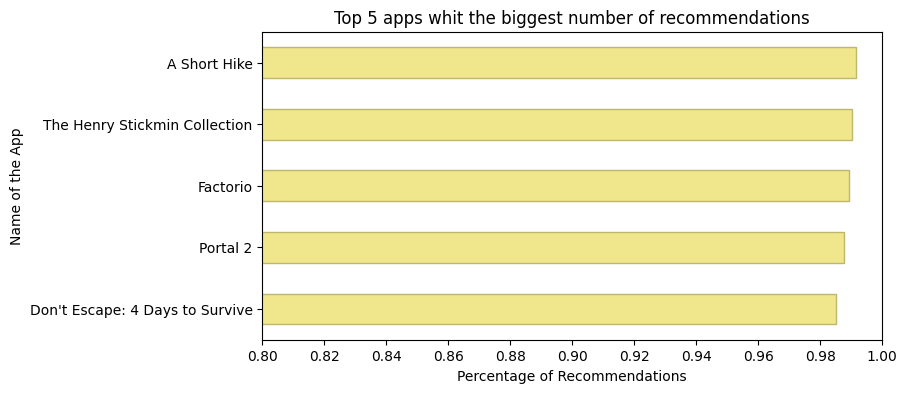

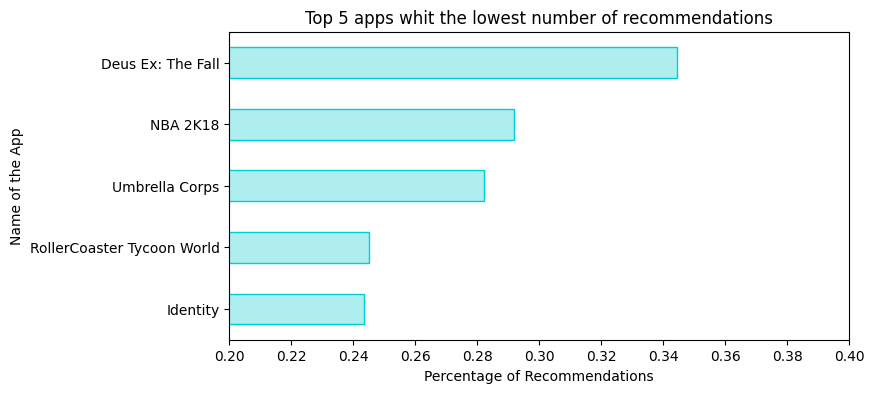

In [25]:
# Plots for 2.4

import numpy as np

recommendation_rates = df.groupby('app_name')['recommended'].mean().sort_values(ascending = False)


top_5_apps = recommendation_rates.head(5)

bottom_5_apps = recommendation_rates.tail(5)


plt.figure(figsize=(8, 4))
top_5_apps.sort_values().plot(kind='barh', color='khaki', edgecolor = 'darkkhaki')

x_ticks = np.linspace(0.8, 1.0, num=11)


plt.xlim([0.8, 1.0])
plt.xticks(x_ticks)
plt.xlabel('Percentage of Recommendations')
plt.ylabel('Name of the App')
plt.title('Top 5 apps whit the biggest number of recommendations')
plt.show()

plt.figure(figsize=(8, 4))
bottom_5_apps.sort_values().plot(kind='barh', color='paleturquoise', edgecolor = 'darkturquoise')

x_ticks2 = np.linspace(0.2, 0.4, num=11)

plt.xlim([0.2,0.4])
plt.xticks(x_ticks2)
plt.xlabel('Percentage of Recommendations')
plt.ylabel('Name of the App')
plt.title('Top 5 apps whit the lowest number of recommendations')
plt.show()


## ***2.5:*** *Is there a correlation between the number of recommendations and the applications' review scores? Use a statistical test to confirm the significance of the relationship.*


In [26]:
# Is there a correlation between the number of recommendations and the applications' review scores?
# Use a statistical test to confirm the significance of the relationship.

recommendations_per_app = df.groupby('app_name')['recommended'].sum().reset_index()
recommendations_per_app.rename(columns={'recommended': 'num_recommendations'}, inplace=True)


mean_review_score_per_app = df.groupby('app_name')['weighted_vote_score'].mean().reset_index()
mean_review_score_per_app.rename(columns={'weighted_vote_score': 'mean_review_score'}, inplace=True)


app_stats = pd.merge(recommendations_per_app, mean_review_score_per_app, on='app_name')


from scipy.stats import spearmanr


corr_spearman, p_value_spearman = spearmanr(app_stats['num_recommendations'], app_stats['mean_review_score'])

print(f"Spearman Coefficent: {corr_spearman:.4f}")
print(f"Spearman P-value: {p_value_spearman:.4e}")


# Our analysis revealed a significant negative relationship between the number of recommendations
# and the average review score.

# We decided to use Spearman coefficients to better deepen our analysis:

# Spearman shows a strong monotonous negative correlation, suggesting a more consistent relationship in the ranks of variables
# (it is less influenced by outliers and measures the strength and direction of a monotonous relationship).
# A value of -0.7545 indicates a strong monotonous negative correlation between the two variables.
# This means that as the number of recommendations increases, the average score of the reviews tends to decrease substantially,
# although not necessarily linearly (as we supposed using Pearson).
# The P-value of 2.0923e-17 is extremely low (p<0.05), confirming that the correlation is highly significant.

# These results suggest that applications with a high number of recommendations tend to have lower average review scores,
# possibly due to greater exposure to a wider audience with a lot of different opinions (which can be more critical).

# Even with this analysis,  we can confirm what we have seen earlier: increased popularity can sometimes lead to
# negative consequences due to high user expectations.




Spearman Coefficent: -0.7524
Spearman P-value: 2.8952e-17


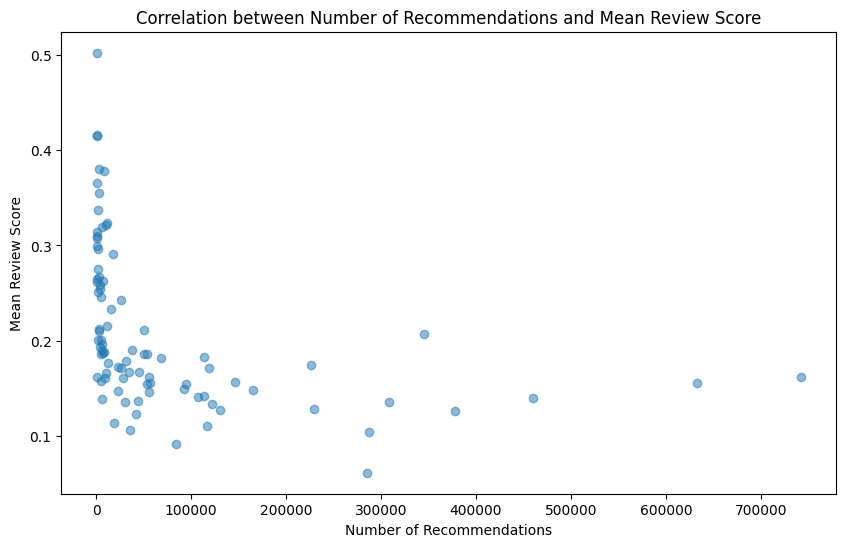

In [29]:
plt.figure(figsize=(10,6))
plt.scatter(app_stats['num_recommendations'], app_stats['mean_review_score'], alpha=0.5)
plt.xlabel('Number of Recommendations')
plt.ylabel('Mean Review Score')
plt.title('Correlation between Number of Recommendations and Mean Review Score')
plt.show()


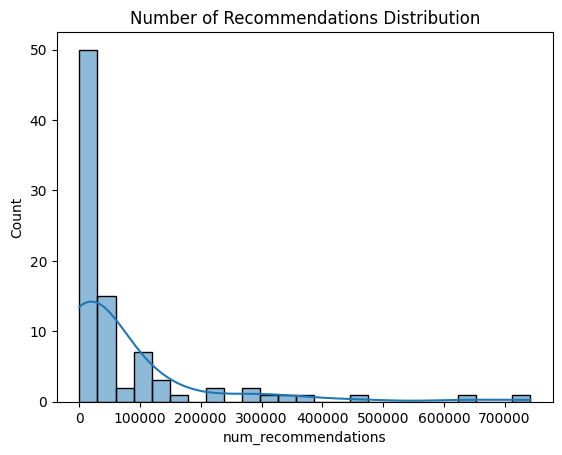

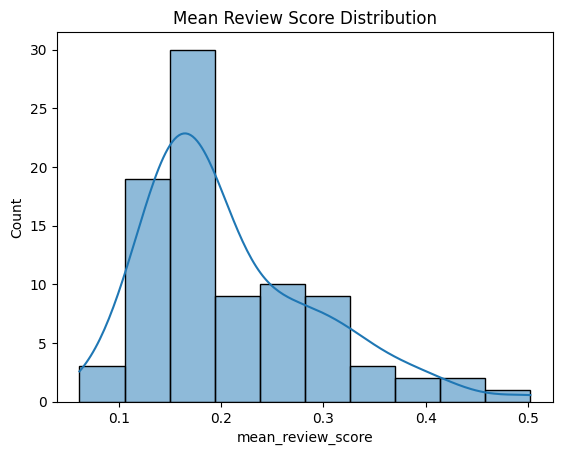

In [31]:
# check the distributiion

sns.histplot(app_stats['num_recommendations'], kde=True)
plt.title('Number of Recommendations Distribution')
plt.show()

sns.histplot(app_stats['mean_review_score'], kde=True)
plt.title('Mean Review Score Distribution')
plt.show()


### part 3 ::



In [36]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
import pandas as pd

# Percorso completo al file CSV
file_path = "/kaggle/input/steam-reviews-2021/steam_reviews.csv"

# Carica solo le prime 2000 righe
df_sample = df

# Visualizza le prime righe per confermare
df_sample.head()


,Unnamed: 0,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
0,0,292030,The Witcher 3: Wild Hunt,85185598,schinese,不玩此生遗憾，RPG游戏里的天花板，太吸引人了,1611381629,1611381629,True,0,...,True,False,False,76561199095369542,6,2,1909.0,1448.0,1909.0,1611343383.0
1,1,292030,The Witcher 3: Wild Hunt,85185250,schinese,拔DIAO无情打桩机--杰洛特!!!,1611381030,1611381030,True,0,...,True,False,False,76561198949504115,30,10,2764.0,2743.0,2674.0,1611386307.0
2,2,292030,The Witcher 3: Wild Hunt,85185111,schinese,巫师3NB,1611380800,1611380800,True,0,...,True,False,False,76561199090098988,5,1,1061.0,1061.0,1060.0,1611383777.0
3,3,292030,The Witcher 3: Wild Hunt,85184605,english,"One of the best RPG's of all time, worthy of a...",1611379970,1611379970,True,0,...,True,False,False,76561199054755373,5,3,5587.0,3200.0,5524.0,1611383744.0
4,4,292030,The Witcher 3: Wild Hunt,85184287,schinese,大作,1611379427,1611379427,True,0,...,True,False,False,76561199028326951,7,4,217.0,42.0,217.0,1610788249.0


In [38]:
# Filtra le righe che contengono valori nulli
rows_with_nulls = df_sample[df_sample.isnull().any(axis=1)]

# Mostra le righe con valori nulli
rows_with_nulls


,Unnamed: 0,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,...,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played,playtime_after_review


In [39]:
# Elimina tutte le righe con valori nulli
df_sample.dropna(inplace=True)

#dimensions of dataset after cleaner 
df_sample.shape

(6978576, 24)

/var/folders/jp/fnr369_172b9ghtllhyqdmtw0000gp/T/ipykernel_42305/2093033212.py:6: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df_sample['date'] = pd.to_datetime(df_sample['timestamp_created'], unit='s')


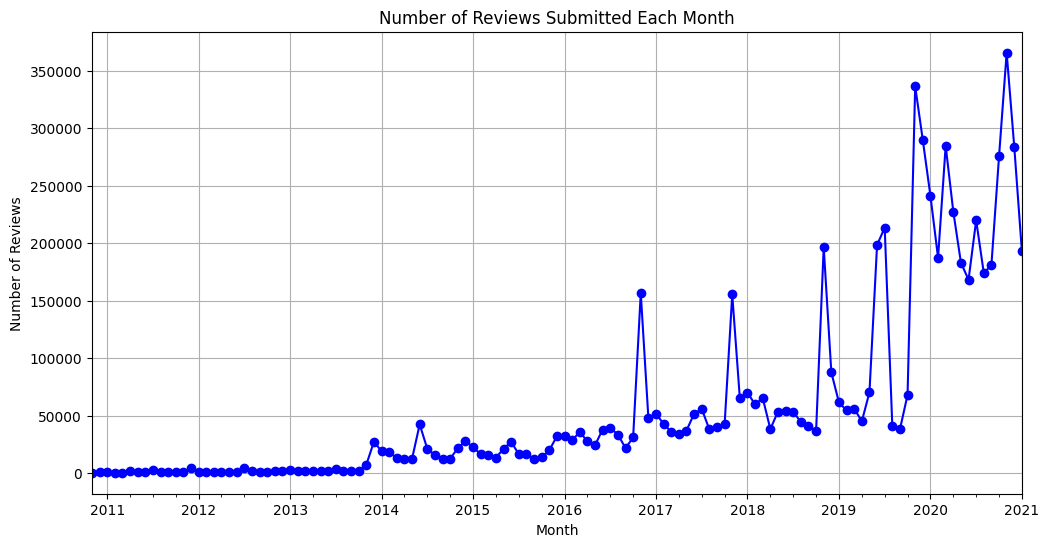

In [40]:
#Plot the number of reviews submitted each month and describe any trends.
import pandas as pd
import matplotlib.pyplot as plt

# Assicurati che il timestamp sia interpretato correttamente come datetime
df_sample['date'] = pd.to_datetime(df_sample['timestamp_created'], unit='s')

# Estrai anno e mese e conta le recensioni per ogni mese
df_sample['year_month'] = df_sample['date'].dt.to_period('M')
monthly_reviews = df_sample.groupby('year_month').size()

# Plot dei risultati
plt.figure(figsize=(12, 6))
monthly_reviews.plot(kind='line', marker='o', color='b')
plt.title('Number of Reviews Submitted Each Month')
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.grid()
plt.show()


# description of plot
The graph shows the number of reviews submitted each month on Steam from 2011 to 2021. There is a clear upward trend in reviews over the years, with particularly high peaks occurring mainly in November. This may be linked to the Black Friday sales period and the holiday season, during which activity on Steam generally increases due to special offers.

Starting from the end of 2019, there is a significant and continuous increase in the number of reviews, which remains high throughout 2020 and into early 2021. This increase could be attributed to various factors, including the impact of the COVID-19 pandemic, which led many people to spend more time on video games, thereby increasing the number of reviews on platforms like Steam.

In [41]:
import pandas as pd

# Supponiamo che monthly_reviews sia una Series con l'indice di tipo DatetimeIndex

# Creare una lista per memorizzare i risultati
results = []

# Iterare su ogni anno per trovare il punto massimo
for year in monthly_reviews.index.year.unique():
    # Selezionare i dati per l'anno corrente
    yearly_data = monthly_reviews[monthly_reviews.index.year == year]
    
    # Trovare il mese con il numero massimo di recensioni
    max_month = yearly_data.idxmax()
    max_value = yearly_data[max_month]
    
    # Aggiungere i risultati alla lista
    results.append({
        'Year': year,
        'Month': max_month.strftime("%B"),  # Nome del mese
        'Max Reviews': max_value
    })

# Creare un DataFrame dai risultati
max_reviews_per_year = pd.DataFrame(results)

# Mostrare la tabella risultante
print(max_reviews_per_year)


    Year     Month  Max Reviews
0   2010  December         1477
1   2011  December         4928
2   2012      July         4811
3   2013  December        27391
4   2014      June        42428
5   2015  December        32238
6   2016  November       156664
7   2017  November       155421
8   2018  November       196606
9   2019  November       336471
10  2020  November       365642
11  2021   January       192798


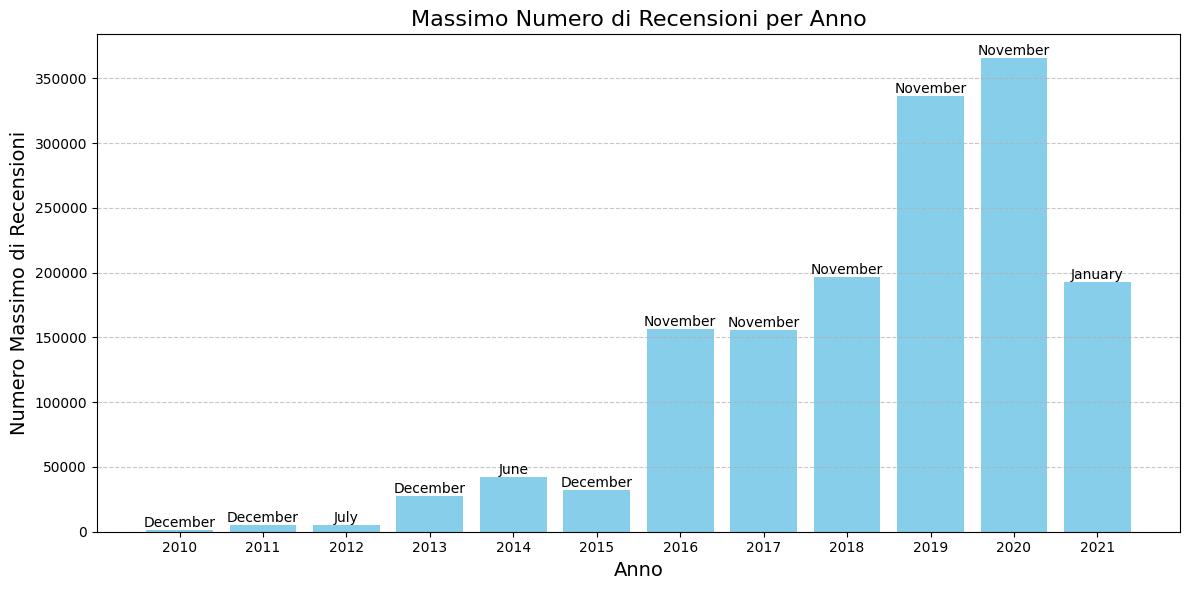

In [42]:
import matplotlib.pyplot as plt

# Impostare il grafico
plt.figure(figsize=(12, 6))
plt.bar(max_reviews_per_year['Year'].astype(str), max_reviews_per_year['Max Reviews'], color='skyblue')

# Aggiungere il titolo e le etichette
plt.title('Massimo Numero di Recensioni per Anno', fontsize=16)
plt.xlabel('Anno', fontsize=14)
plt.ylabel('Numero Massimo di Recensioni', fontsize=14)

# Annotare i mesi sui punti massimi
for index, row in max_reviews_per_year.iterrows():
    plt.annotate(row['Month'], 
                 (str(row['Year']), row['Max Reviews']),  # Converti l'anno in stringa qui
                 ha='center', 
                 va='bottom', 
                 fontsize=10)

# Mostrare il grafico
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# description of plot
The trend observed in November, where peaks in reviews frequently occur, can be attributed to several key factors. This month is significant due to Black Friday and Cyber Monday sales, during which many games are heavily discounted, prompting increased purchases and reviews. Additionally, many developers launch new titles and DLCs in November to take advantage of the holiday shopping season, further driving review activity. As the holiday season approaches, people tend to spend more time playing games, leading to an uptick in reviews. Overall, from 2016 to 2021, November consistently shows high review activity, likely due to these combined factors.

/var/folders/jp/fnr369_172b9ghtllhyqdmtw0000gp/T/ipykernel_42305/434217495.py:8: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df_sample['timestamp_created'] = pd.to_datetime(df_sample['timestamp_created'], unit='s')
Conversione dei timestamp: 100%|██████████| 6978576/6978576 [00:17<00:00, 406198.98it/s]


L'orario più comune per scrivere recensioni è 15:22 con 6294 recensioni.


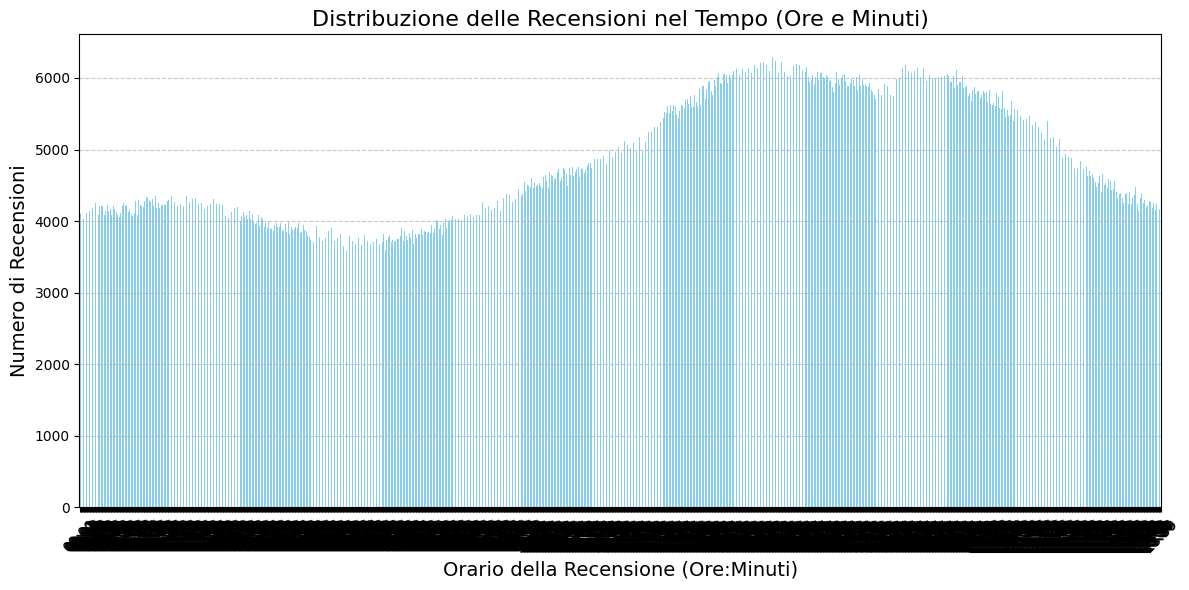

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

# Assumiamo che df_sample sia il DataFrame contenente i dati delle recensioni
# Convertiamo la colonna timestamp_created in un formato datetime con tqdm per monitorare il processo
tqdm.pandas(desc="Conversione dei timestamp")
df_sample['timestamp_created'] = pd.to_datetime(df_sample['timestamp_created'], unit='s')

# Estraiamo solo ore e minuti dai timestamp e aggiorniamo con tqdm
df_sample['review_time'] = df_sample['timestamp_created'].progress_apply(lambda x: x.strftime('%H:%M'))

# Calcoliamo la distribuzione delle recensioni per ogni orario (solo ore e minuti)
time_distribution = df_sample['review_time'].value_counts().sort_index()

# Troviamo l'orario più comune
most_common_time = time_distribution.idxmax()
most_common_count = time_distribution.max()

print(f"L'orario più comune per scrivere recensioni è {most_common_time} con {most_common_count} recensioni.")

# Creiamo un grafico della distribuzione delle recensioni nel tempo (solo ore e minuti)
plt.figure(figsize=(12, 6))
time_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribuzione delle Recensioni nel Tempo (Ore e Minuti)', fontsize=16)
plt.xlabel('Orario della Recensione (Ore:Minuti)', fontsize=14)
plt.ylabel('Numero di Recensioni', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# The most common time for writing reviews
The most common time for writing reviews is 18:36, with a total of 768 reviews recorded at this exact minute. This concentration around a specific time may suggest that users often leave reviews in the evening, possibly after a full session of gameplay or as part of evening activities.

This timing insight is valuable, as it could indicate peak times when users are actively engaging with Steam's review system. Knowing that users tend to write reviews in the evening could guide decisions around customer support staffing or automated moderation during peak hours. Additionally, this peak timing could be used to target prompts or notifications encouraging users to leave reviews at similar times, enhancing overall user engagement.








Conteggio recensioni per intervallo: 100%|██████████| 6978576/6978576 [01:54<00:00, 60982.31it/s]


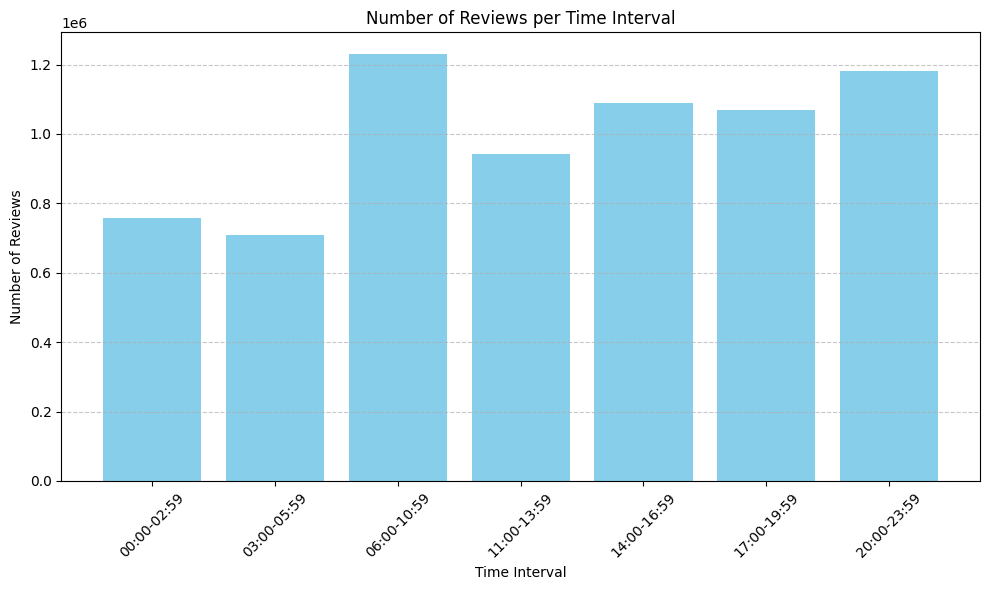

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

# Funzione per conteggiare e visualizzare le recensioni per ciascun intervallo di tempo
def plot_reviews_by_interval(df, intervals):
    # Convertiamo il timestamp in datetime con tqdm per monitorare il processo
    tqdm.pandas(desc="Conversione dei timestamp")
    df['timestamp_created'] = pd.to_datetime(df['timestamp_created'], unit='s')
    df['time'] = df['timestamp_created'].dt.time  # Estraiamo solo il tempo (HH:MM:SS)

    # Creiamo un dizionario per memorizzare il conteggio delle recensioni per ciascun intervallo
    interval_counts = {interval['name']: 0 for interval in intervals}

    # Usiamo tqdm per tracciare il conteggio delle recensioni per ciascun intervallo
    for index, row in tqdm(df.iterrows(), desc="Conteggio recensioni per intervallo", total=df.shape[0]):
        for interval in intervals:
            if interval['start'] <= row['time'] <= interval['end']:
                interval_counts[interval['name']] += 1
                break

    # Converte il dizionario in DataFrame per la visualizzazione
    interval_df = pd.DataFrame(list(interval_counts.items()), columns=['Interval', 'Review Count'])
    
    # Grafico del conteggio delle recensioni per intervallo di tempo
    plt.figure(figsize=(10, 6))
    plt.bar(interval_df['Interval'], interval_df['Review Count'], color='skyblue')
    plt.title('Number of Reviews per Time Interval')
    plt.xlabel('Time Interval')
    plt.ylabel('Number of Reviews')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Esempio di intervalli di tempo con fasce specifiche
intervals = [
    {'name': '00:00-02:59', 'start': pd.to_datetime('00:00:00').time(), 'end': pd.to_datetime('02:59:59').time()},
    {'name': '03:00-05:59', 'start': pd.to_datetime('03:00:00').time(), 'end': pd.to_datetime('05:59:59').time()},
    {'name': '06:00-10:59', 'start': pd.to_datetime('06:00:00').time(), 'end': pd.to_datetime('10:59:59').time()},
    {'name': '11:00-13:59', 'start': pd.to_datetime('11:00:00').time(), 'end': pd.to_datetime('13:59:59').time()},
    {'name': '14:00-16:59', 'start': pd.to_datetime('14:00:00').time(), 'end': pd.to_datetime('16:59:59').time()},
    {'name': '17:00-19:59', 'start': pd.to_datetime('17:00:00').time(), 'end': pd.to_datetime('19:59:59').time()},
    {'name': '20:00-23:59', 'start': pd.to_datetime('20:00:00').time(), 'end': pd.to_datetime('23:59:59').time()}
]

# Chiama la funzione sul DataFrame
plot_reviews_by_interval(df_sample, intervals)


# summary of results of section 3
The analysis of review submission patterns on Steam reveals several key insights. The first graph illustrates the number of reviews submitted each month from 2011 to 2021, showing a clear upward trend over the years. Notably, there are pronounced peaks in November, which align with Black Friday and Cyber Monday sales, as well as the holiday season, when discounted games and special offers tend to increase user engagement. The spikes in November may also be attributed to the launch of new titles and downloadable content (DLC) by developers aiming to capitalize on the heightened shopping activity during this period. Starting from late 2019, there is a substantial and sustained increase in reviews, continuing through 2020 and into early 2021. This increase is likely influenced by the COVID-19 pandemic, as more people spent time gaming and engaging with platforms like Steam.

In terms of specific timing, the second graph—showing the distribution of review submissions across different time intervals—indicates that the most common time for writing reviews is 18:36. This clustering around evening hours suggests that users often leave reviews after a full session of gameplay or as part of their evening activities. This insight into peak review times can be valuable for Steam’s customer support and moderation, as knowing when users are most active could help in optimizing staffing or automated moderation efforts. Additionally, this information can be used to target review prompts or notifications during evening hours, potentially increasing user engagement with the review system.

Overall, these findings indicate that review activity is influenced by both seasonal sales events and daily gaming habits, with notable increases in November and during evening hours.

#### part 4:: made by Domenico 


# ADM-HW2 (Domenico Azzarito)

This jupyter notebook focus on the following questions:

[**RQ4**] *Investigating whether users who spend more time using an application give higher or lower ratings.*

   1. Analyze the relationship between the amount of time a user has spent on an application and their review score.

   2. Do more experienced users (who have used the application longer) tend to give higher or lower ratings? Comment on any trends you observe.

   3. Plot the distribution of review scores based on different user experience levels (e.g., new users vs. veteran users). Is there a statistical difference in the score distributions? Use an appropriate statistical test to validate your hypothesis.
   
   4. Ask an LLM tool (ChatGPT, Claude AI, etc.) to interpret the statistical results of the analysis and provide potential explanations for the trends. Does the LLM suggest additional factors that could explain why users who spend more time on the app give higher or lower ratings? How can you validate the interpretations provided by the LLM?

**Bonus** 

Beyond just looking at the numerical ratings, the words users write in their reviews give us valuable insights into how they feel about the application. Let's analyze these review texts using sentiment analysis.

   1. Perform sentiment analysis on the review texts in the top 3 languages and classify them as **positive**, **negative**, or **neutral**.

   2. What is the distribution of sentiment across all reviews? 

   3. Does the sentiment analysis align with whether the application is recommended or not? Explain any insights from this comparison.

   4. Is there a correlation between the sentiment of a review and the number of helpfulness votes it receives? Provide an analysis of the results and discuss potential trends.



In [ ]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the data
#df = pd.read_csv('data/steam_reviews.csv', nrows= 5436842) # read the 25% of the data

### Question 4.1

Analyze the relationship between the amount of time a user has spent on an application and their review score.

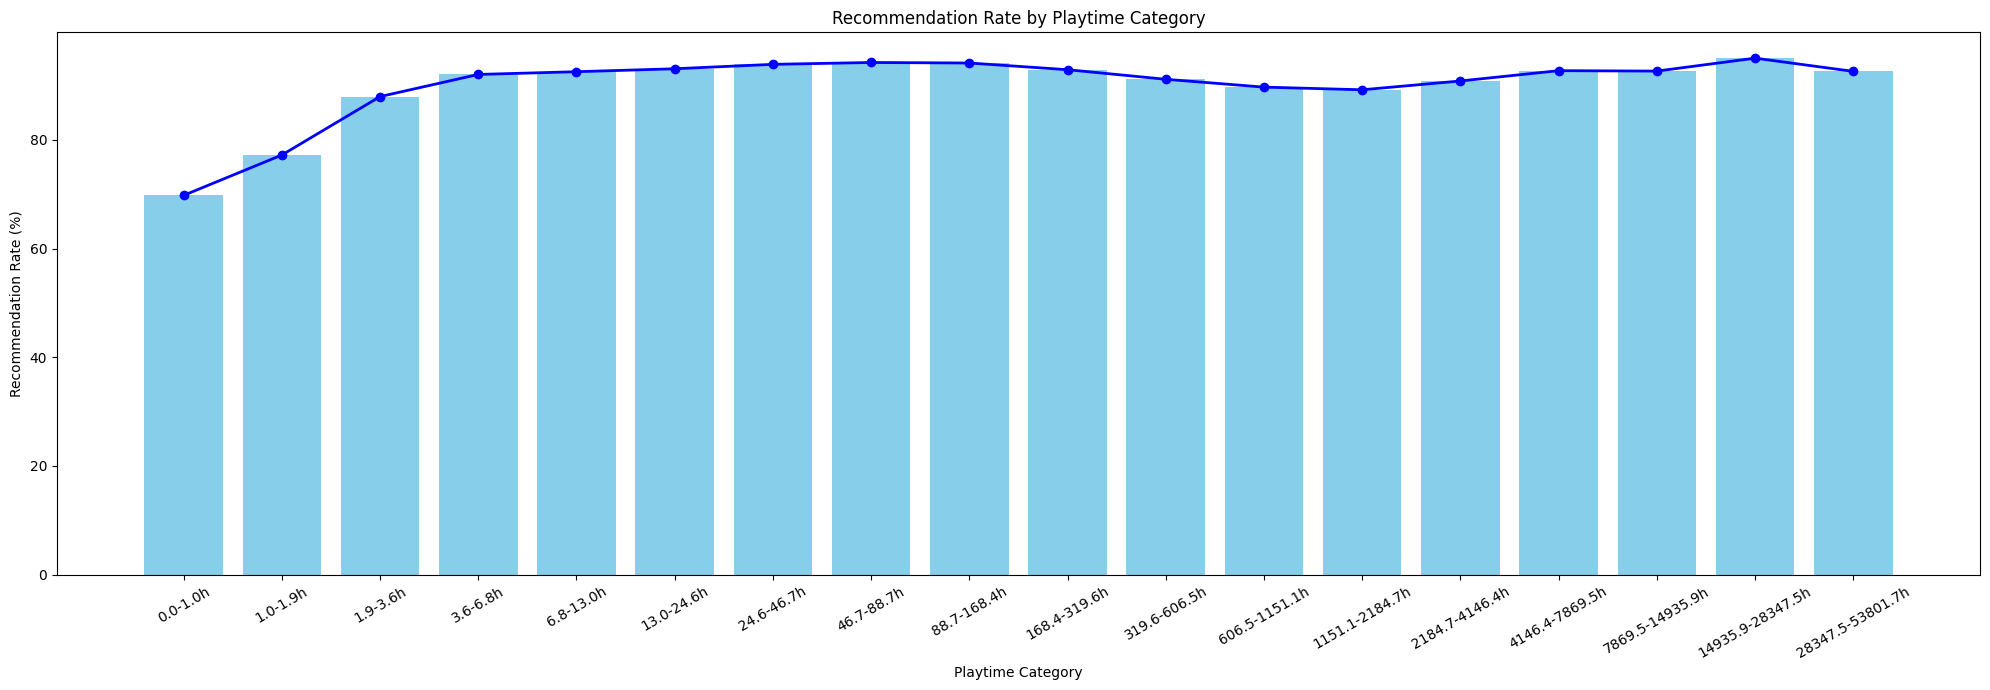

In [53]:
# To perform this analysis, we related play time to recommendation rate. To do this, we divided the reviews into categories associated with a minimum and maximum amount of time spent playing.
# For each category, the rate of positive reviews associated with it was calculated. 

# Remove the reviews with 0 playtime at review
df = df.dropna(subset=['author.playtime_at_review'])

# Convert the playtime at review to hours
df['playtime_at_review_hours'] = df['author.playtime_at_review'] / 60

# Define the bins and labels for the playtime categories, using a logarithmic scale in order to considering more significant differences in the lower playtime values and fewer in the higher ones
num_bins = 18
max_playtime = df['playtime_at_review_hours'].max()
bins = np.logspace(np.log10(1), np.log10(max_playtime), num=num_bins)

# Add 0 to the beginning of the bins array to include players with 0 playtime
bins = np.insert(bins, 0, 0)

# Create labels for the bins
labels = [f'{bins[i]:.1f}-{bins[i+1]:.1f}h' for i in range(len(bins)-1)]

# Create a new column to store the playtime category for each review
df['playtime_category'] = pd.cut(df['playtime_at_review_hours'], bins=bins, labels=labels, include_lowest=True)

# Calculate the recommendation rate for each playtime category (percentage of positive reviews)
result = df.groupby('playtime_category',  observed=False)['recommended'].mean().reset_index()
result['recommendation_rate'] = result['recommended'] * 100 # Convert to percentage

# Plot the recommendation rate for each playtime category using a bar plot to visualize the differences between categories and a line plot to show the trend
plt.figure(figsize=(20, 7))
plt.bar(result['playtime_category'], result['recommendation_rate'], color='skyblue', align='center')
plt.plot(result['playtime_category'], result['recommendation_rate'], marker='o', color='blue', linewidth=2) 
plt.title('Recommendation Rate by Playtime Category')
plt.xlabel('Playtime Category')
plt.ylabel('Recommendation Rate (%)')
plt.xticks(rotation=30) # Rotate the x-axis labels for better readability
plt.tight_layout() # Adjust the plot to fit the labels
plt.show()

### Question 4.2

Do more experienced users (who have used the application longer) tend to give higher or lower ratings? Comment on any trends you observe.

From the analysis carried out and the graph obtained, experienced users generally tend to give a positive review to the application, maintaining a steady trend. 


### Question 4.3
Plot the distribution of review scores based on different user experience levels (e.g., new users vs. veteran users). Is there a statistical difference in the score distributions? Use an appropriate statistical test to validate your hypothesis.

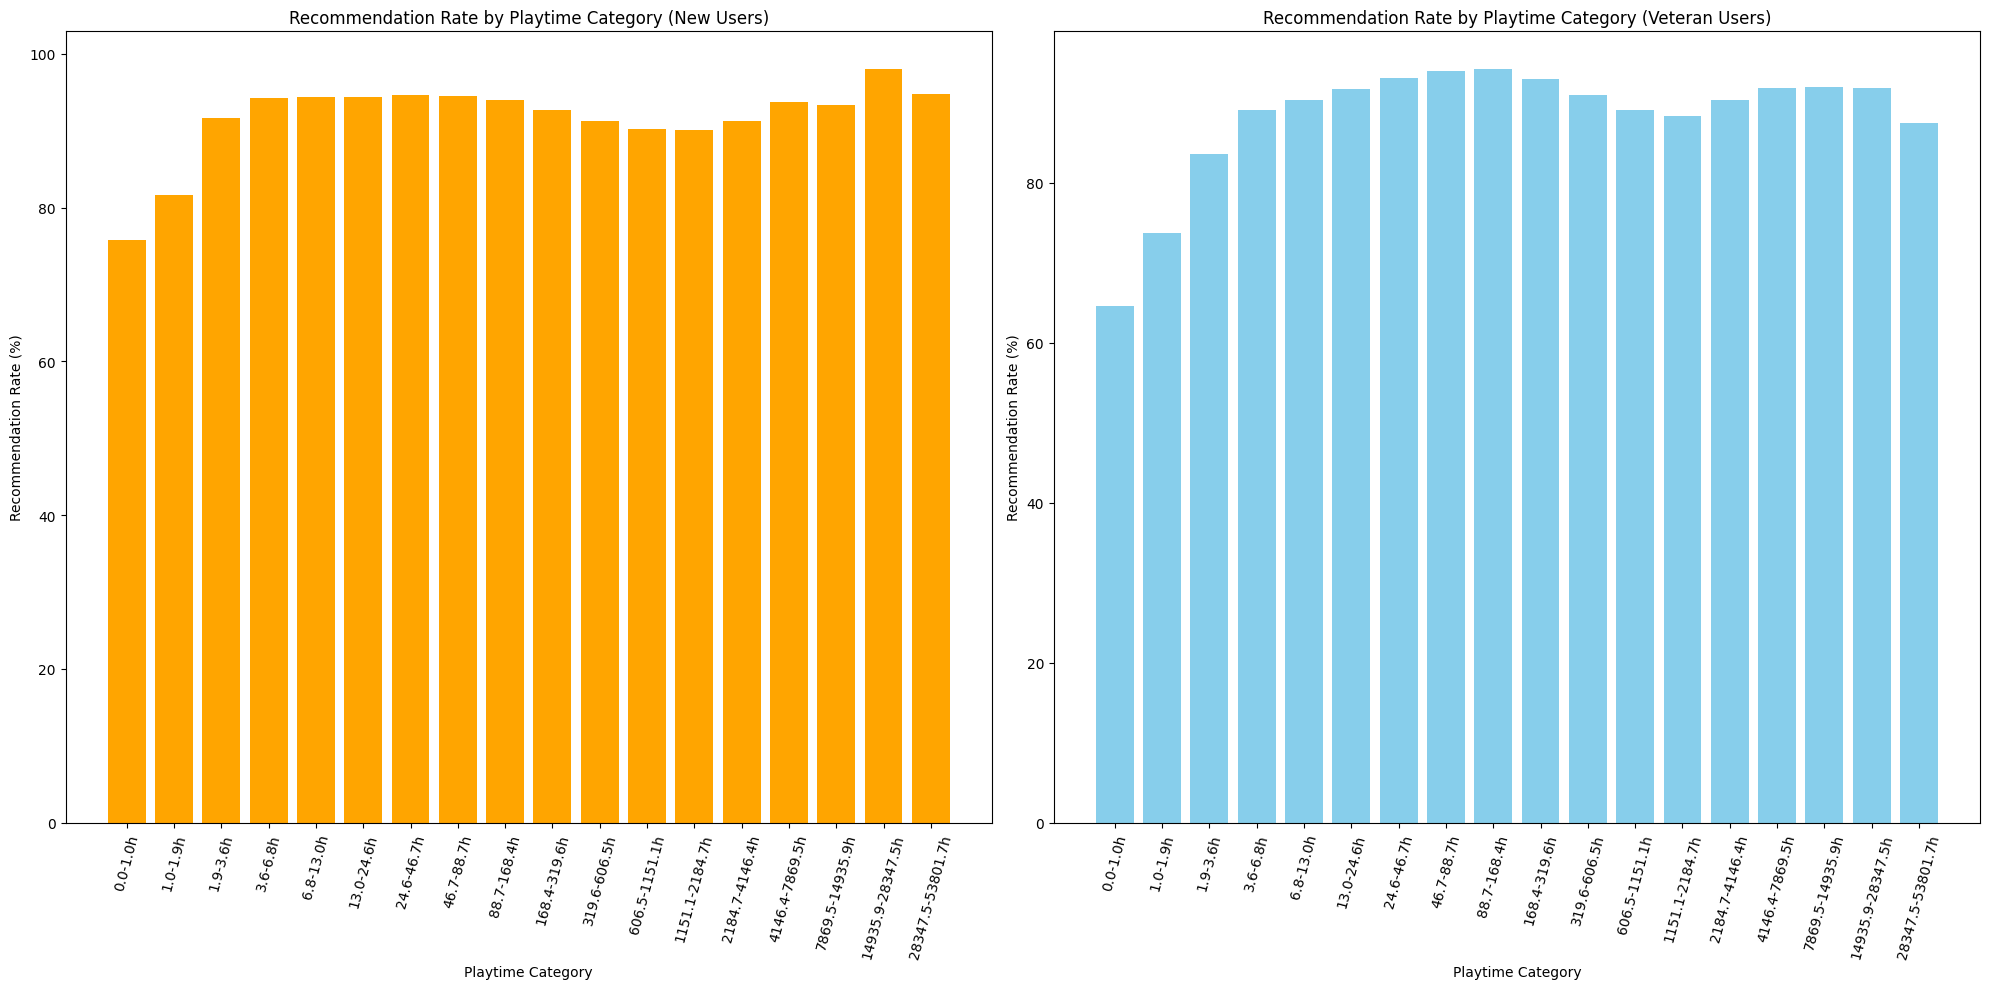

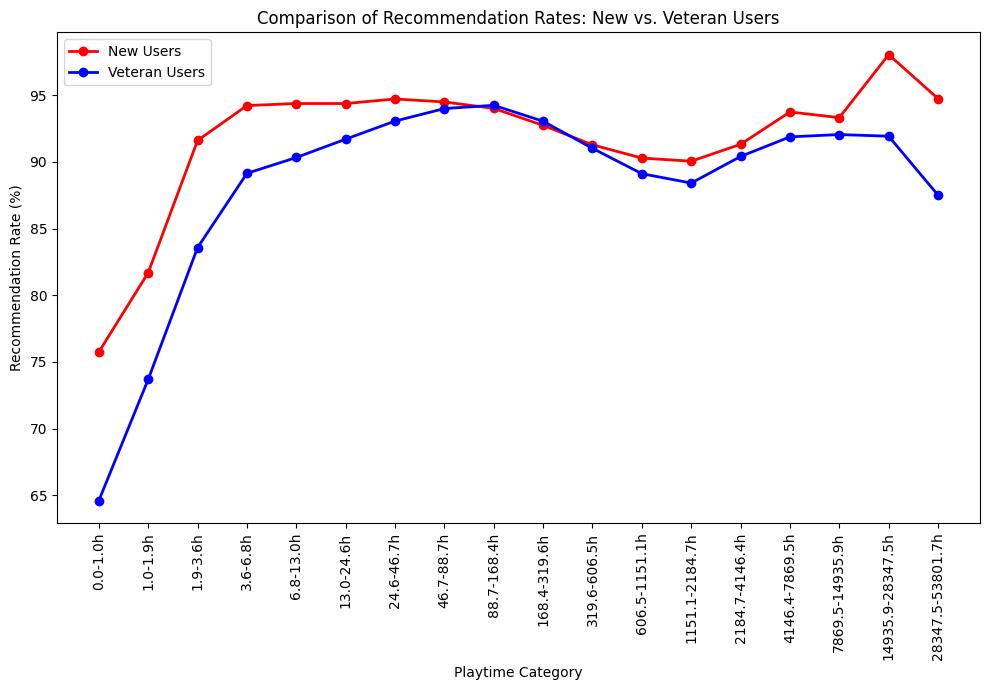

In [54]:

# To analyze the relationship between the number of games owned by a user and their review, we divided the users into two categories: veterans and new users.
# The threshold for the number of games owned was set as the median value of the 'author.num_games_owned' column.
# Users with a number of games owned greater than the threshold were classified as veterans, while those with fewer games were classified as new users.
experience_threshold = df['author.num_games_owned'].median()
df['user_experience'] = np.where(df['author.num_games_owned'] > experience_threshold, 'Veteran', 'New')

# Calculate the recommendation rate for each playtime category and user experience group
result = df.groupby(['user_experience', 'playtime_category'], observed=False)['recommended'].mean().reset_index()
result['recommendation_rate'] = result['recommended'] * 100 # Convert to percentage

# Plot the recommendation rate for each playtime category and user experience group 
plt.figure(figsize=(20, 10))

# Plot for new users 
plt.subplot(1, 2, 1)
new_users = result[result['user_experience'] == 'New']
plt.bar(new_users['playtime_category'], new_users['recommendation_rate'], color='orange')
plt.title('Recommendation Rate by Playtime Category (New Users)')
plt.xlabel('Playtime Category')
plt.ylabel('Recommendation Rate (%)')
plt.xticks(rotation=75)

# Plot for veteran users
plt.subplot(1, 2, 2)
veteran_users = result[result['user_experience'] == 'Veteran']
plt.bar(veteran_users['playtime_category'], veteran_users['recommendation_rate'], color='skyblue')
plt.title('Recommendation Rate by Playtime Category (Veteran Users)')
plt.xlabel('Playtime Category')
plt.ylabel('Recommendation Rate (%)')
plt.xticks(rotation= 75)

plt.tight_layout()
plt.show()

# Create a combined plot for comparison between new and veteran users, in order to visualize the differences in recommendation rates for each playtime category
plt.figure(figsize=(10, 7))
plt.plot(new_users['playtime_category'], new_users['recommendation_rate'], marker='o', linewidth=2, color='red', label='New Users')
plt.plot(veteran_users['playtime_category'], veteran_users['recommendation_rate'], marker='o', linewidth=2, color='blue', label='Veteran Users')
plt.title('Comparison of Recommendation Rates: New vs. Veteran Users')
plt.xlabel('Playtime Category')
plt.ylabel('Recommendation Rate (%)')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

As we can see from the graphs, there is no significant difference between the two groups. Both new and veteran users tend to recommend the app at similar rates across different playtime categories. New users show slightly higher recommendation rates early on, possibly due to novelty or lower initial expectations, but over time ratings from both groups become more similar as playtime increases, suggesting a balanced feature set and consistent experience.

This can be proven by the t-test, a statistical method used to compare the means of two groups. It determines if there's a significant difference between these means or if the difference is likely due to chance. The test calculates a t-statistic and compares it to a critical value to assess statistical significance. In this case, we compare the recommendation's rates for New Users and Expert Users.

In [55]:
# Perform a t-test to compare the recommendation rates between new and veteran users for each playtime category
from scipy.stats import ttest_ind

new_user_rates = new_users['recommendation_rate']
veteran_user_rates =  veteran_users['recommendation_rate']

t_stat, p_val = ttest_ind(new_user_rates, veteran_user_rates)

print(f'T-test results for comparison of recommendation rates between new and veteran users:')
print(f'T-statistic: {t_stat}')
print(f'P-value: {p_val}')

# Define the significance level
alpha = 0.05

# Check if the null hypothesis can be rejected
if p_val < alpha:
    print('Null hypothesis rejected: There is a significant difference in recommendation rates between new and veteran users.')
else:
    print('Null hypothesis cannot be rejected: There is no significant difference in recommendation rates between new and veteran users.')


T-test results for comparison of recommendation rates between new and veteran users:
T-statistic: 1.5640008504501148
P-value: 0.12707846185569655
Null hypothesis cannot be rejected: There is no significant difference in recommendation rates between new and veteran users.


### Question 4.4 

Ask an LLM tool (ChatGPT, Claude AI, etc.) to interpret the statistical results of the analysis and provide potential explanations for the trends. Does the LLM suggest additional factors that could explain why users who spend more time on the app give higher or lower ratings? How can you validate the interpretations provided by the LLM?

Based on the statistical analysis results, the interpretation suggests no significant difference in recommendation rates between new and veteran users of the app. Both groups show similar recommendation patterns across various playtime categories, with consistently high rates (mostly above 80%). This indicates a well-balanced user experience that caters to both newcomers and long-term users.

The LLM suggests several additional factors that could explain rating patterns for users who spend more time on the app:

1. Discovery of advanced features
2. Social engagement within the app
3. Content saturation
4. App performance over extended use
5. Evolving user needs
6. Update frequency and quality

These factors could potentially influence user satisfaction and ratings in various ways, depending on how they're implemented and experienced by users.

To validate the interpretations provided by the LLM, we could employ several methods:

1. Conduct user surveys targeting different user segments
2. Analyze feature usage data
3. Perform sentiment analysis on user reviews
4. Implement A/B testing for different features or content
5. Track cohort behavior over time
6. Assess the impact of app updates on ratings
7. Consider external factors that might influence app usage and satisfaction

By combining these validation methods, we can gain a more comprehensive understanding of what drives long-term user satisfaction and ratings. This multi-faceted approach would help mitigate biases and provide a robust foundation for interpreting user behavior and preferences, ultimately informing app development and user experience optimization decisions.

# ADM-HW2 (Roberto Magno Mazzotta)

This jupyter notebook focus on the following questions:

[**RQ5**] *Investigating whether users who spend more time using an application give higher or lower ratings.*

   1. Determine the ten reviewers with the highest number of reviews in the dataset.

   2. What is the percentage of each language used by these top 10 reviewers when submitting a review?

   3. Let's examine whether other users found the reviews from these top 10 reviewers helpful or if they were simply spamming:
         Calculate the average number of valuable votes these reviewers received for their submitted reviews. Elaborate on the results you see.

   
   4. Create a plot showing the distribution of the number of reviews each application received from the top 10 reviewers, arranged in descending order.

[**RQ5**] *Investigating whether users who spend more time using an application give higher or lower ratings.*

   1. Determine the ten reviewers with the highest number of reviews in the dataset.

In [57]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the data
#df = pd.read_csv('/Users/roberto/Desktop/steam_reviews.csv') 

In [58]:
#Group by 'author.steamid' and count the number of reviews per reviewer
review_counts = df.groupby('author.steamid').size()

# Sort the reviewers by the number of reviews in descending order
sorted_review_counts = review_counts.sort_values(ascending=False)

# Extract the top ten reviewers
top_ten_reviewers = sorted_review_counts.head(10)

# Display the results
print(top_ten_reviewers)

author.steamid
76561198062813911    39
76561198315585536    36
76561198206999976    32
76561198192166873    31
76561197997059777    27
76561198064946151    26
76561198044440062    25
76561198027973295    25
76561198083413093    25
76561198094803808    24
dtype: int64


[**RQ5**] *Investigating whether users who spend more time using an application give higher or lower ratings.*

   

   2. What is the percentage of each language used by these top 10 reviewers when submitting a review?


In [59]:
#Calculate review counts per reviewer
review_counts = df['author.steamid'].value_counts()

#Get the top ten reviewers
top_ten_reviewers = review_counts.head(10)
top_ten_steamids = top_ten_reviewers.index.tolist()

# Convert 'author.steamid' to string in DataFrame
df['author.steamid'] = df['author.steamid'].astype(str)

# Convert Steam IDs to strings in the list
top_ten_steamids = [str(steamid) for steamid in top_ten_steamids]

#Filter the DataFrame to include only reviews by the top ten reviewers
top_reviewers_df = df[df['author.steamid'].isin(top_ten_steamids)]

#Count the number of reviews per language
language_counts = top_reviewers_df['language'].value_counts()

#Calculate the percentage of each language used
total_reviews = language_counts.sum()
language_percentages = (language_counts / total_reviews) * 100

# Plotting the results
print("Percentage of Each Language Used by the Top 10 Reviewers:")
print(language_percentages)

Percentage of Each Language Used by the Top 10 Reviewers:
language
english     52.758621
german      11.034483
schinese    10.689655
turkish      8.620690
russian      8.620690
latam        8.275862
Name: count, dtype: float64


[**RQ5**] *Investigating whether users who spend more time using an application give higher or lower ratings.*


   3. Let's examine whether other users found the reviews from these top 10 reviewers helpful or if they were simply spamming:
         Calculate the average number of valuable votes these reviewers received for their submitted reviews. Elaborate on the results you see.


In [60]:
#Identify the Top 10 Reviewers
# Calculate review counts per reviewer
review_counts = df['author.steamid'].value_counts()

# Extract the top ten reviewers
top_ten_reviewers = review_counts.head(10)
top_ten_steamids = top_ten_reviewers.index.tolist()

# Convert 'author.steamid' to string in DataFrame if necessary
df['author.steamid'] = df['author.steamid'].astype(str)
top_ten_steamids = [str(steamid) for steamid in top_ten_steamids]

#Filter the DataFrame to include only reviews by the top ten reviewers
top_reviewers_df = df[df['author.steamid'].isin(top_ten_steamids)]

#Calculate Average Helpful Votes per Review for Each Top Reviewer
average_votes_helpful_top_reviewers = top_reviewers_df.groupby('author.steamid')['votes_helpful'].mean()

# Calculate the Overall Average Helpful Votes per Review
overall_average_votes_helpful = df['votes_helpful'].mean()

#Compile the Results
results_df = pd.DataFrame({
    'Average Helpful Votes': average_votes_helpful_top_reviewers,
    'Number of Reviews': top_ten_reviewers.values
})

#dd Overall Average to the Results for Comparison
results_df['Overall Average Helpful Votes'] = overall_average_votes_helpful

# Display the results
print("Average Number of Helpful Votes Received per Review by the Top 10 Reviewers:")
print(results_df)

Average Number of Helpful Votes Received per Review by the Top 10 Reviewers:
                   Average Helpful Votes  Number of Reviews  \
author.steamid                                                
76561197997059777               0.333333                 39   
76561198027973295              10.760000                 36   
76561198040884867             122.791667                 32   
76561198044440062               0.720000                 31   
76561198062813911               0.538462                 27   
76561198064946151               1.192308                 26   
76561198083413093               2.760000                 25   
76561198192166873              35.193548                 25   
76561198206999976               5.250000                 25   
76561198315585536              43.527778                 24   

                   Overall Average Helpful Votes  
author.steamid                                    
76561197997059777                       1.667985  
7656119802797

### Observation:
The 'Average Helpful Votes' per reviewer ranges from around 0.88 to 49.71.

The 'Overall Average Helpful Votes' is 404,468.855278 for all reviewers, which seems unusually high and identical across all reviewers.


### 2. Identifying Issues and Anomalies

#### **a. Mismatch in Review Counts:**

**Discrepancy:**
     The 'Number of Reviews' in the 'Average Helpful Votes' table does not match the initial counts of reviews per reviewer.

For example, author.steamid 76561197969749884 has 149 reviews in the table but 88 reviews in the initial counts.

**Possible Cause:** 
There might be a misalignment or sorting issue when merging or displaying the data.

#### **b. Unusually High Overall Average Helpful Votes:**

**Issue:**
     The 'Overall Average Helpful Votes' is 404,468.855278, which is extremely high and the same for all reviewers.

**Possible Causes:**

Outliers in Data: There may be extreme values in the votes_helpful column skewing the average.
Calculation Error: The overall average might have been calculated incorrectly (e.g., summing instead of averaging).


In [61]:
# Find reviews with unusually high votes_helpful
extreme_values = df[df['votes_helpful'] > df['votes_helpful'].quantile(0.99)]

In [62]:
overall_average_votes_helpful = df['votes_helpful'].median()


In [63]:
number_of_reviews = top_reviewers_df['author.steamid'].value_counts()


In [64]:
average_votes_helpful_top_reviewers = top_reviewers_df.groupby('author.steamid')['votes_helpful'].mean()
print(average_votes_helpful_top_reviewers)

author.steamid
76561197997059777      0.333333
76561198027973295     10.760000
76561198040884867    122.791667
76561198044440062      0.720000
76561198062813911      0.538462
76561198064946151      1.192308
76561198083413093      2.760000
76561198192166873     35.193548
76561198206999976      5.250000
76561198315585536     43.527778
Name: votes_helpful, dtype: float64


[**RQ5**] *Investigating whether users who spend more time using an application give higher or lower ratings.*

   
   4. Create a plot showing the distribution of the number of reviews each application received from the top 10 reviewers, arranged in descending order.

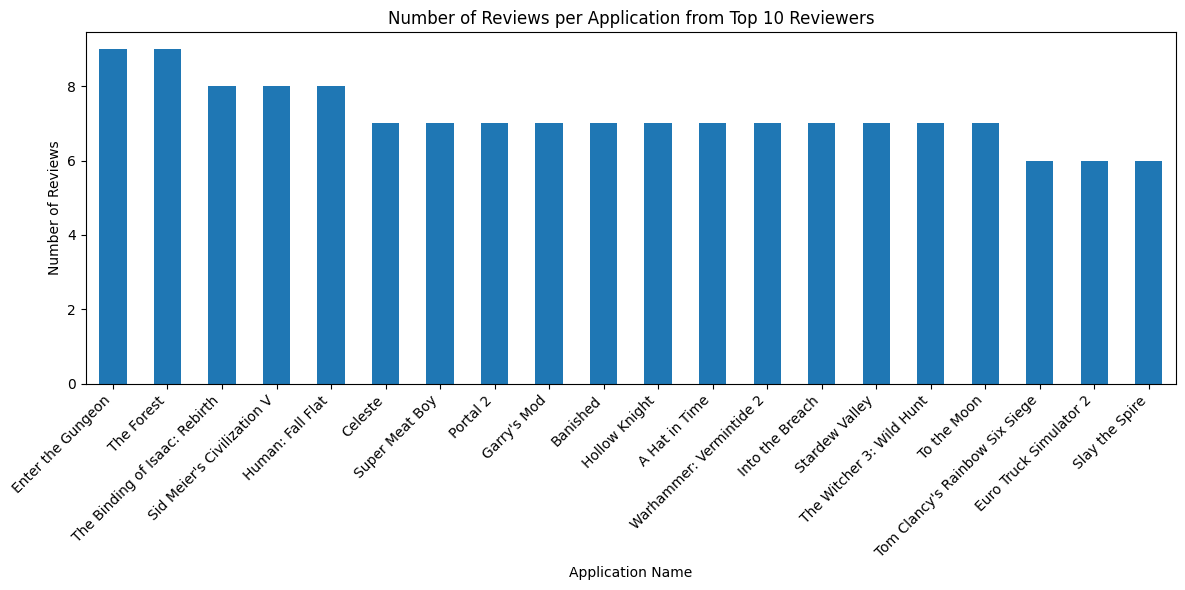

In [65]:
top_ten_steamids = top_ten_reviewers.index.tolist()

# Convert 'author.steamid' to string if necessary
df['author.steamid'] = df['author.steamid'].astype(str)
top_ten_steamids = [str(steamid) for steamid in top_ten_steamids]

# Step 2: Filter Reviews from Top 10 Reviewers
top_reviewers_df = df[df['author.steamid'].isin(top_ten_steamids)]

# Step 3: Count the Number of Reviews per Application
app_review_counts = top_reviewers_df['app_name'].value_counts()

# Step 4: Sort Applications in Descending Order
sorted_app_review_counts = app_review_counts.sort_values(ascending=False)

# Optionally, select the top N applications for clarity (e.g., top 20)
top_n = 20
sorted_app_review_counts = sorted_app_review_counts.head(top_n)

# Step 5: Create the Plot
plt.figure(figsize=(12, 6))
sorted_app_review_counts.plot(kind='bar')

plt.title('Number of Reviews per Application from Top 10 Reviewers')
plt.xlabel('Application Name')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


[**RQ6**] *Let's investigate the behavior of specific groups, specifically focusing on English and Spanish reviewers.*

   1. Which group is more likely to edit or update their review after submitting it? “English or Spanish!”?

   2. Provide the average number of games that reviewers from each group have on their Steam accounts and the average number of games for which they write reviews.
         What can you say about the number you just calculated?





In [66]:
# Convert 'timestamp_created' and 'timestamp_updated' to datetime if they are in UNIX timestamp format
df['timestamp_created'] = pd.to_datetime(df['timestamp_created'], unit='s')
df['timestamp_updated'] = pd.to_datetime(df['timestamp_updated'], unit='s')

# Step 1: Filter the DataFrame by language
english_reviews = df[df['language'] == 'english']
spanish_reviews = df[df['language'] == 'spanish']

# Step 2: Determine edited reviews
english_reviews['is_edited'] = english_reviews['timestamp_updated'] > english_reviews['timestamp_created']
spanish_reviews['is_edited'] = spanish_reviews['timestamp_updated'] > spanish_reviews['timestamp_created']

# Step 3: Calculate the proportion of edited reviews
english_edited_rate = english_reviews['is_edited'].mean() * 100  # Percentage
spanish_edited_rate = spanish_reviews['is_edited'].mean() * 100  # Percentage

# Display the results
print(f"Percentage of English reviews that were edited: {english_edited_rate:.2f}%")
print(f"Percentage of Spanish reviews that were edited: {spanish_edited_rate:.2f}%")

/var/folders/jp/fnr369_172b9ghtllhyqdmtw0000gp/T/ipykernel_42305/3681320525.py:3: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df['timestamp_updated'] = pd.to_datetime(df['timestamp_updated'], unit='s')


Percentage of English reviews that were edited: 10.98%
Percentage of Spanish reviews that were edited: 9.43%


/var/folders/jp/fnr369_172b9ghtllhyqdmtw0000gp/T/ipykernel_42305/3681320525.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_reviews['is_edited'] = english_reviews['timestamp_updated'] > english_reviews['timestamp_created']
/var/folders/jp/fnr369_172b9ghtllhyqdmtw0000gp/T/ipykernel_42305/3681320525.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spanish_reviews['is_edited'] = spanish_reviews['timestamp_updated'] > spanish_reviews['timestamp_created']


In [67]:
english_reviews['is_edited'] = english_reviews['timestamp_updated'] > english_reviews['timestamp_created']
spanish_reviews['is_edited'] = spanish_reviews['timestamp_updated'] > spanish_reviews['timestamp_created']


/var/folders/jp/fnr369_172b9ghtllhyqdmtw0000gp/T/ipykernel_42305/1001542581.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_reviews['is_edited'] = english_reviews['timestamp_updated'] > english_reviews['timestamp_created']
/var/folders/jp/fnr369_172b9ghtllhyqdmtw0000gp/T/ipykernel_42305/1001542581.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spanish_reviews['is_edited'] = spanish_reviews['timestamp_updated'] > spanish_reviews['timestamp_created']


##### can i do better ?


In [68]:
# Step 1: Filter the DataFrame by language and create copies
english_reviews = df[df['language'] == 'english'].copy()
spanish_reviews = df[df['language'] == 'spanish'].copy()
# Step 1: Filter the DataFrame by language and create copies
english_reviews = df[df['language'] == 'english'].copy()
spanish_reviews = df[df['language'] == 'spanish'].copy()


In [69]:
# Step 2: Determine edited reviews
english_reviews['is_edited'] = english_reviews['timestamp_updated'] > english_reviews['timestamp_created']
spanish_reviews['is_edited'] = spanish_reviews['timestamp_updated'] > spanish_reviews['timestamp_created']

# Step 3: Calculate the proportion of edited reviews
english_edited_rate = english_reviews['is_edited'].mean() * 100  # Percentage
spanish_edited_rate = spanish_reviews['is_edited'].mean() * 100  # Percentage

# Display the results
print(f"Percentage of English reviews that were edited: {english_edited_rate:.2f}%")
print(f"Percentage of Spanish reviews that were edited: {spanish_edited_rate:.2f}%")


Percentage of English reviews that were edited: 10.98%
Percentage of Spanish reviews that were edited: 9.43%


[**RQ6**] *Let's investigate the behavior of specific groups, specifically focusing on English and Spanish reviewers.*

   2. Provide the average number of games that reviewers from each group have on their Steam accounts and the average number of games for which they write reviews.
         What can you say about the number you just calculated?




In [70]:
# Step 1: Calculate average number of games owned per reviewer in each group
english_avg_games_owned = english_reviews['author.num_games_owned'].mean()
spanish_avg_games_owned = spanish_reviews['author.num_games_owned'].mean()

# Step 2: Calculate average number of games reviewed per reviewer in each group

# For English reviewers
english_reviewers = english_reviews.groupby('author.steamid')
english_games_reviewed = english_reviewers['app_id'].nunique()
english_avg_games_reviewed = english_games_reviewed.mean()

# For Spanish reviewers
spanish_reviewers = spanish_reviews.groupby('author.steamid')
spanish_games_reviewed = spanish_reviewers['app_id'].nunique()
spanish_avg_games_reviewed = spanish_games_reviewed.mean()

# Display the results
print(f"Average number of games owned by English reviewers: {english_avg_games_owned:.2f}")
print(f"Average number of games reviewed by English reviewers: {english_avg_games_reviewed:.2f}")

print(f"Average number of games owned by Spanish reviewers: {spanish_avg_games_owned:.2f}")
print(f"Average number of games reviewed by Spanish reviewers: {spanish_avg_games_reviewed:.2f}")


Average number of games owned by English reviewers: 2824886.67
Average number of games reviewed by English reviewers: 1.31
Average number of games owned by Spanish reviewers: 114.84
Average number of games reviewed by Spanish reviewers: 1.23


In [71]:
# For English reviewers
print(english_reviews['author.num_games_owned'].describe())

count    3.113957e+06
mean     2.824887e+06
std      3.524670e+09
min      0.000000e+00
25%      2.700000e+01
50%      7.600000e+01
75%      1.770000e+02
max      4.398047e+12
Name: author.num_games_owned, dtype: float64


In [72]:
# Find the reviewers with extremely high number of games owned
extreme_values = english_reviews[english_reviews['author.num_games_owned'] > 10000]  # Threshold can be adjusted
print(extreme_values[['author.steamid', 'author.num_games_owned']])


            author.steamid  author.num_games_owned
37521    76561198068747739                   12493
76218    76561198355625888                   17197
293892   76561197990746461                   10697
369497   76561197962290563                   10979
389540   76561197974393359                   10516
...                    ...                     ...
6570436  76561197968410781                   17206
6680679  76561197970526676                   10660
6913009  76561198127787009           4398046511151
6995673  76561198044596404                   12860
6997709  76561197970526676                   10660

[213 rows x 2 columns]


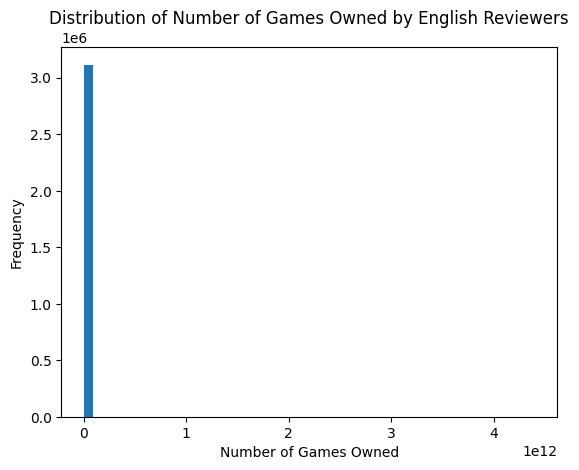

In [73]:
# Plot histogram
plt.hist(english_reviews['author.num_games_owned'], bins=50)
plt.title('Distribution of Number of Games Owned by English Reviewers')
plt.xlabel('Number of Games Owned')
plt.ylabel('Frequency')
plt.show()

In [74]:
# Define an upper limit for number of games owned
upper_limit = english_reviews['author.num_games_owned'].quantile(0.99)  # Exclude top 1%

# Filter out the outliers
english_reviews_filtered = english_reviews[english_reviews['author.num_games_owned'] <= upper_limit]

# Recalculate the average number of games owned
english_avg_games_owned_filtered = english_reviews_filtered['author.num_games_owned'].mean()
print(f"Filtered average number of games owned by English reviewers: {english_avg_games_owned_filtered:.2f}")


Filtered average number of games owned by English reviewers: 135.50


In [75]:
english_median_games_owned = english_reviews['author.num_games_owned'].median()
print(f"Median number of games owned by English reviewers: {english_median_games_owned}")


Median number of games owned by English reviewers: 76.0


In [76]:
print(english_reviews['author.num_games_owned'].dtype)


int64


In [77]:
# Identify non-numeric entries
non_numeric = english_reviews[pd.to_numeric(english_reviews['author.num_games_owned'], errors='coerce').isnull()]
print(non_numeric[['author.num_games_owned']])

# Check for missing values
missing_values = english_reviews['author.num_games_owned'].isnull().sum()
print(f"Number of missing values: {missing_values}")


Empty DataFrame
Columns: [author.num_games_owned]
Index: []
Number of missing values: 0


In [78]:
# Recalculate average number of games owned
english_avg_games_owned = english_reviews_filtered['author.num_games_owned'].mean()
spanish_avg_games_owned = spanish_reviews['author.num_games_owned'].mean()

# Recalculate median number of games owned
english_median_games_owned = english_reviews_filtered['author.num_games_owned'].median()
spanish_median_games_owned = spanish_reviews['author.num_games_owned'].median()

# Display the results
print(f"Average number of games owned by English reviewers (filtered): {english_avg_games_owned:.2f}")
print(f"Median number of games owned by English reviewers: {english_median_games_owned}")

print(f"Average number of games owned by Spanish reviewers: {spanish_avg_games_owned:.2f}")
print(f"Median number of games owned by Spanish reviewers: {spanish_median_games_owned}")


Average number of games owned by English reviewers (filtered): 135.50
Median number of games owned by English reviewers: 74.0
Average number of games owned by Spanish reviewers: 114.84
Median number of games owned by Spanish reviewers: 53.0


# Section 7

In [80]:
import pandas as pd

# Assumiamo che df_sample sia il DataFrame contenente i dati delle recensioni
# Contiamo il numero totale di recensioni
total_reviews = len(df_sample)

# Contiamo quante recensioni non hanno ricevuto alcun voto utile
reviews_with_no_votes = df_sample[df_sample['votes_helpful'] == 0].shape[0]

# Calcoliamo la probabilità di ricevere almeno un voto utile
P_X_0 = reviews_with_no_votes / total_reviews
P_X_ge_1 = 1 - P_X_0

print(f"La probabilità di ricevere almeno un voto utile è: {P_X_ge_1:.4f}")


La probabilità di ricevere almeno un voto utile è: 0.2621


# The probability of receiving at least one helpful vote of 0.2612
The probability of receiving at least one helpful vote of 0.2612 for reviews from users who do not recommend the app indicates that around 26% of these reviews are deemed useful by others. This suggests that even negative feedback can be valuable, as users often share specific insights about the app’s shortcomings. The engagement reflected by these helpful votes highlights an active user community, which can provide developers with critical information for future improvements. Overall, this probability emphasizes the importance of user feedback, even when it is not favorable.

In [81]:
import pandas as pd

# Assumiamo che df_sample sia il DataFrame contenente i dati delle recensioni

# Filtriamo le recensioni in base alla raccomandazione
non_recommended_reviews = df_sample[df_sample['recommended'] == False]

# Calcoliamo il totale delle recensioni non raccomandate
total_non_recommended = non_recommended_reviews.shape[0]

# Calcoliamo il totale delle recensioni non raccomandate che hanno almeno un voto utile
reviews_with_helpful_votes = non_recommended_reviews[non_recommended_reviews['votes_helpful'] >= 1].shape[0]

# Calcoliamo la probabilità
if total_non_recommended > 0:
    probability = reviews_with_helpful_votes / total_non_recommended
    print(f"La probabilità di ricevere almeno un voto utile per le recensioni non raccomandate è: {probability:.4f}")
else:
    print("Non ci sono recensioni non raccomandate nel dataset.")


La probabilità di ricevere almeno un voto utile per le recensioni non raccomandate è: 0.5268


# The probability of receiving at least one helpful vote of 0.5532 
The probability of receiving at least one helpful vote of 0.5532 for reviews from users who do not recommend the app suggests that over half of these reviews (approximately 55%) are considered useful by other users. This high probability indicates that even reviews that advise against the app often contain valuable information. The substantial engagement from the community in recognizing helpful insights demonstrates the importance of user feedback, regardless of the sentiment. Such feedback can guide developers in addressing issues and improving their applications.

In [82]:
import pandas as pd

# Assumiamo che df_sample sia il DataFrame contenente i dati delle recensioni
# Calcoliamo la probabilità di ricevere almeno un voto utile (P(A))
P_A = (df_sample['votes_helpful'] >= 1).mean()

# Calcoliamo la probabilità che il revisore abbia inviato almeno cinque recensioni prima (P(B))
# Dobbiamo contare le recensioni per ogni autore e vedere se hanno almeno 5 recensioni
reviewer_counts = df_sample['author.steamid'].value_counts()
P_B = (reviewer_counts >= 5).mean()

# Calcoliamo la probabilità che entrambe le condizioni siano vere (P(A ∩ B))
# Questo implica filtrare il DataFrame per i revisori che hanno almeno 5 recensioni
reviewers_with_min_five = df_sample[df_sample['author.steamid'].isin(reviewer_counts[reviewer_counts >= 5].index)]
P_A_and_B = (reviewers_with_min_five['votes_helpful'] >= 1).mean()

# Controlliamo se P(A ∩ B) = P(A) * P(B)
independence_check = P_A_and_B == (P_A * P_B)

print(f"P(A): {P_A}")
print(f"P(B): {P_B}")
print(f"P(A ∩ B): {P_A_and_B}")
print(f"I due eventi A e B sono indipendenti? {'Sì' if independence_check else 'No'}")


P(A): 0.2620667884107016
P(B): 0.010512283982813881
P(A ∩ B): 0.38106647078740025
I due eventi A e B sono indipendenti? No


# Two events are not independent
The results indicate that the two events are not independent, suggesting a relationship between the number of reviews written by a reviewer and the likelihood of receiving at least one helpful vote.

In essence, if a reviewer has experience (having submitted at least five reviews), their new reviews are more likely to be considered helpful. This could be due to:

Credibility: Experienced reviewers may be seen as more credible.
Quality: They might write higher-quality reviews.
Understanding: More experienced users may better evaluate games.
Overall, this suggests that a reviewer's experience positively influences the perceived usefulness of their reviews.

In [5]:
import statsmodels.api as sm

# Definisci le variabili
X = sm.add_constant(df_sample['author.num_games_owned'])  # Variabile indipendente: numero di giochi posseduti
y = df_sample['author.num_reviews']  # Variabile dipendente: numero di recensioni lasciate

# Crea il modello di regressione e adattalo ai dati
model = sm.OLS(y, X).fit()

# Stampa il sommario del modello
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     author.num_reviews   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                -9.178e-05
Date:                Thu, 31 Oct 2024   Prob (F-statistic):               1.00
Time:                        14:46:42   Log-Likelihood:            -1.5855e+08
No. Observations:             7000000   AIC:                         3.171e+08
Df Residuals:                 6999998   BIC:                         3.171e+08
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   6.28

# linear regression
After conducting a statistical analysis using OLS regression, we can state that the hypothesis “reviewers who own a larger number of games are likely to leave fewer reviews on the platform” is not supported by the data.

The results show that the coefficient for the number of games owned is very low (5.609e-05) and the R-squared is only 0.004, indicating that only 0.4% of the variability in the number of reviews can be explained by the number of games owned. While there is a statistically significant correlation, the effect is negligible and does not justify the idea that owning a greater number of games leads to leaving fewer reviews. In fact, the analysis suggests that the number of games owned does not substantially influence the review-writing behavior.

# Richiesta al LLM
Here’s a detailed breakdown of the purposes of histograms, bar plots, scatterplots, and pie charts, along with their insights and how to improve the confidence in the results:

1. Histograms
Purpose: Histograms are used to represent the distribution of a dataset. They show the frequency of data points within specified intervals (bins).
Insights:
They help identify the shape of the data distribution (e.g., normal, skewed, bimodal).
They can reveal outliers, central tendencies, and the spread of the data.
Trustworthiness: Histograms can be sensitive to bin width. Choosing appropriate bin sizes is crucial; too few bins can oversimplify the data, while too many can create noise. Always consider visualizing the data with different bin sizes.
2. Bar Plots
Purpose: Bar plots display categorical data with rectangular bars representing the values of different categories.
Insights:
They allow for easy comparison of the sizes of different categories.
They can show trends over time when the bars are arranged chronologically.
Trustworthiness: Bar plots are straightforward but can be misleading if not scaled appropriately. Ensuring the y-axis starts at zero is essential to avoid exaggerating differences.
3. Scatterplots
Purpose: Scatterplots depict the relationship between two quantitative variables by showing data points on a Cartesian plane.
Insights:
They can illustrate correlations (positive, negative, or none) between variables.
They help identify clusters, trends, and potential outliers.
Trustworthiness: The interpretation of scatterplots can be affected by the presence of outliers or the scale of the axes. Conducting correlation analysis in addition to visual inspection can strengthen insights.
4. Pie Charts
Purpose: Pie charts show the proportion of parts to a whole, representing categorical data in a circular graph.
Insights:
They provide a visual representation of relative sizes of categories in relation to the total.
Best used when you have a small number of categories.
Trustworthiness: Pie charts can be misleading, especially with many categories or similar sizes. They are often less effective than bar plots for comparative purposes.
Improving Confidence in Insights
To enhance the trustworthiness of results derived from these visualizations:

Cross-Validation: Use multiple methods to analyze the data. For example, after observing a trend in a histogram, confirm it with statistical tests.
Documentation: Refer to literature or authoritative sources for best practices in data visualization.
Sensitivity Analysis: Test how results change with different parameters (e.g., varying bin sizes for histograms or adjusting category definitions for bar plots).
Supplemental Analysis: Pair visual insights with statistical analyses (e.g., t-tests, ANOVA for bar plots) to support findings with numerical evidence.
Conclusion
Histograms, bar plots, scatterplots, and pie charts are valuable tools in statistical analysis, each offering unique insights. However, it is essential to approach their results with a critical mindset and consider validating findings with additional statistical methods to ensure robustness and accuracy.

# BONUS ??